In [1]:
import math
import numpy as np

# Elliptical, parabolic, and hyperbolic orbits using the Euler method

In the simple_two_body.ipynb notebook I implemented circular orbits with arbitary starting positions and confirmed that the truncation error converged linearly with timestep for the Euler method.  

In this notebook I plan to implement hyperbolic, elliptical, and parabolic orbits using the Euler method. Parabolic orbits are marginally bound, hyperbolic orbits are unbound, and elliptical orbits are bound but oblong. All orbits should have the center of mass at one focus for both stars orbit and be symmetric between the two stars. 

Elliptical orbits should be elongated away from the other star. 

Hyperbolic and parabolic orbits should open away from the other star. 

All orbits should conserve energy and angular momentum. Later this could be enforced. I will probably not do that in this notebook. 

It would be meaningless to evaluate the L0 error for a hyperbolic or parabolic orbit since there is no cycle and the L0 error is found after one or more cycles when the system returns to its starting point. However, it would be possible to evaluate it for the elliptical orbit system, and I intend to check that the convergence of the L0 error with dt is linear as it should be for the Euler method. 

Because the convergence can be tested for ellipses only and because ellipses are closed so make it clear if they are not working correctly graphically, I will begin with ellipses then proceed to parabolas and hyperbolas. 

# Conic sections

Circles, ellipses, parabolas, and hyperbolas are called conic sections because they can all be obtained by taking slices of an infinite cone. 

Conic sections are related to each other through a parameter called eccentricity. Circles have an eccentricity of 0. Ellipses have an eccentricity of 0<e<1. Parabolas have an eccentricity of e=1. Hyperbolas have an eccentricity of e>1. 

Circles are described by the equation x^2+y^2=r^2 where r is the radius. They can also be described parametrically using sine and cosine. That is done below. 

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
centerx=3
centery=5
p = figure(title="Circle", plot_width=400, plot_height=400)
p.line(centerx+np.cos(t),centery+np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(centerx,centery,line_width=15,line_color="green",legend="Center")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

Ellipses are shaped like ovals. They have two locations called focuses that determine their shapes. If a string were connected to both focuses, which are inside the ellipse, you could slide a pencil along the string and draw the ellipse keeping the string taut. The two focuses and the ellipse form a triangle with hypoteneuses of fixed length. 

Half the shorter of the two widths of the ellipse is called the semimajor axis, a. It's like a radius for ellipses. The lenght of the longer width is (1+e)*a. The focus is offset from the center by f=e*sqrt(1-e^2)*a. 

Ellipses can also be drawn at angles to the axis. An ellipse aligned with the x and y axis is shown below. 

The nonparametric equation for an ellipse is x^2/a^2+y^2/b^2=1
Below the ellipse is described parametrically. 

In [3]:
def getfocus(a,ecc):
    b=a*(1+ecc)
    return np.sqrt(b**2-a**2)

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
a=10
ecc=.5
b=a*(1+ecc)
centerx=0
centery=0
focusx=centerx+getfocus(a,ecc)
focusy=centery+0.0
p = figure(title="Ellipse", plot_width=400, plot_height=400, x_range=[-15,15], y_range=[-15,15])
p.line(centerx+b*np.cos(t),centery+a*np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(focusx,focusy,line_width=15,line_color="green",legend="Focus 1")
p.circle(centerx-getfocus(a,ecc),focusy, line_width=15, line_color="red", legend="Focus 2")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonianForce(mass1,mass2, r):
    return (6.67408*10**-11)*mass1*mass2/r/r;

In [6]:
def euler(h,t, x,y,z,f,debugprint):
    xstep = (f(t, x, y,z)+f(t+h,x+h,y,z))/2*h
    xnew=x+xstep
    if(debugprint):
        print(h,t,x,xstep,xnew)
    return t+h,xnew

In [7]:
import math
def InitialDataEqualMassConic(ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([orbitalangle,math.pi+orbitalangle])
    orbitalradius=100*np.ones(2) #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [8]:
import random,numpy as np
initdateqellipse=InitialDataEqualMassConic(0.3,0.0,1.)
print(initdateqellipse)

angle 0.0
0.3
(array([0.        , 3.14159265]), 0.0, array([100., 100.]), 0.3, array([1., 1.]))


In [9]:
def getxyuveqconicredmass(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius[0]/2. #reduced mass
        focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        E=-Gconstant*masses[0]*masses[1]/(2.*orbitalr) #orbitalradius is correct here r1+r2.
        #This factor of half is due to the virial (VEE-REE-AHL) theorem, a stellar dynamics theorem governing the 
        #equipartion of degrees of freedom of energy in a system. Another way of writing it is T=-1/2*V. 2T-V=0
        coordsep=orbitalr*(1.+eccentricity) #starts at apastron
        starsep=coordsep-focusdisp #reduced mass, M is at center, apastron
        Eapastron=-Gconstant*masses[0]*masses[1]/(2.*starsep) #factor of 2 virial again
        Fapastron=Eapastron/(starsep)
        print("E,F",E,Fapastron,2*orbitalr,starsep)
        x0=coordsep*cosphi
        y0=coordsep*sinphi
        x0[0]=0.0
        y0[0]=0.0
        v=np.zeros(2)
        v[0]=0.0
        v[1]=np.sqrt(2.*(E-2*Eapastron)/masses[1]) #1/2*mv^2-GMm/starsep=E. Solve for v. Eapastron=-GMm/2starsep
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a[0]=0.0
        a[1]=Fapastron/masses[1]
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        for i in np.arange(2):
            a[i]=Gconstant*masses[(i+1)%2]/(r0[i]**2)
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    
    
    return masses,x0,y0,z0, ux0, uy0,uz0, ax0, ay0,az0

In [10]:
xyuvaeqconicredmass=getxyuveqconicredmass(initdateqellipse)
print(xyuvaeqconicredmass)

initdat [100. 100.] [0.         3.14159265] [ 1. -1.] [0.0000000e+00 1.2246468e-16]
coordsep [100. 100.]
zero
pi
[ 100. -100.]
[0. 0.]
0.3
E,F -0.01 -0.0009079444408717398 100.0 23.466880685409627
(array([1., 1.]), array([  0., -65.]), array([0., 0.]), array([0., 0.]), array([-0., -0.]), array([ 0.        , -0.25539478]), array([0., 0.]), array([-0.        , -0.00090794]), array([-0.,  0.]), array([0., 0.]))


In [11]:
def timestep(step,t,dt,mtotal, mass,xi,yi,zi, vxi, vyi, vzi, axi, ayi, azi):
    xii=np.zeros(np.size(xi))
    vxii=np.zeros(np.size(vxi))
    yii=np.zeros(np.size(yi))
    vyii=np.zeros(np.size(vyi))
    zii=np.zeros(np.size(vzi))
    vzii=np.zeros(np.size(vzi))
    rii=np.zeros(np.size(xi))
    axii=np.zeros(np.size(axi))
    ayii=np.zeros(np.size(ayi))
    azii=np.zeros(np.size(azi))
    
    #This is redundant in the center of mass system
    Gconstant=6.408*10**-11
    Gconstant=1
    for k in np.arange(len(rii)):
        for j in np.arange(len(rii)):
            if j!=k:
                if j==0: #reduced mass
                    axii[0]=0.0
                    ayii[0]=0.0
                    azii[0]=0.0
                else:
                    rreljk=np.abs((xi[j] - xi[k])**2+(yi[j]-yi[k])**2+(zi[j]-zi[k])**2)**(1./2.)
                    #print(rreljk)
                    axii[j]-=Gconstant*mass[k]*(xi[j]  - xi[k])/rreljk**3
                    ayii[j]-=Gconstant*mass[k]*(yi[j]  - yi[k])/rreljk**3
                    azii[j]-=Gconstant*mass[k]*(zi[j]  - zi[k])/rreljk**3
    #print(xii)
    
    for m in np.arange(len(x)):
        #m represents choices of mass
        i=step
        
        xii[m] = xi[m] + dt*vxi[m]
        vxii[m] = vxi[m] + dt*axi[m]
        yii[m]= yi[m] + dt*vyi[m]
        vyii[m] = vyi[m] + dt*ayi[m]
        zii[m]= zi[m] + dt*vzi[m]
        vzii[m] = vzi[m] + dt*azi[m]
        rii[m]=np.sqrt(xi[m]**2+yi[m]**2+zi[m]**2)
        
        #print(vyii[m],vyi[m],ayi[m],dt)
        #print(yii[m],yi[m],vyi[m],dt)
    
    
    return mass, xii,yii,zii,vxii,vyii,vzii,axii,ayii,azii
                    

In [12]:
dt=1 #*31556926 #seconds per year
numsteps=10000
mass0,x,y,z0,vx,vy,vz0,ax,ay,az0=xyuvaeqconicredmass
print(x)
xcoord1=[]
xcoord2=[]
ycoord1=[]
ycoord2=[]
t=0.0
masstotal=1.
for i in np.arange(1,numsteps):
    mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(i,t,dt,masstotal,mass0,x,y,z0,vx,vy,vz0,ax,ay,az0)
    print(x,y,vx,vy,ax,ay)
    #print(ay) #forces should be equal and opposite, but in reduced mass framework accelerations are also equal and opposite
    #accelerations should evolve from y to x with time in a sinusoidal manner even in reduced mass framework
    #print(ax)
    xcoord1.append(x[0])
    xcoord2.append(x[1])
    ycoord1.append(y[0])
    ycoord2.append(y[1])
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(2,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(3,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(4,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 

[  0. -65.]
[  0. -65.] [ 0.         -0.25539478] [-0.         -0.00090794] [ 0.         -0.25539478] [0.         0.00023669] [0. 0.]
[  0.         -65.00090794] [ 0.         -0.51078957] [ 0.         -0.00067126] [ 0.         -0.25539478] [0.         0.00023668] [0.00000000e+00 9.29954918e-07]
[  0.        -65.0015792] [ 0.         -0.76618435] [ 0.         -0.00043458] [ 0.         -0.25539385] [0.         0.00023666] [0.00000000e+00 1.85970271e-06]
[  0.         -65.00201378] [ 0.        -1.0215782] [ 0.         -0.00019792] [ 0.         -0.25539199] [0.         0.00023663] [0.00000000e+00 2.78914473e-06]
[  0.        -65.0022117] [ 0.        -1.2769702] [0.00000000e+00 3.87062908e-05] [ 0.        -0.2553892] [0.         0.00023658] [0.00000000e+00 3.71817906e-06]
[  0.         -65.00217299] [ 0.        -1.5323594] [0.         0.00027529] [ 0.         -0.25538549] [0.         0.00023653] [0.00000000e+00 4.64670391e-06]
[  0.        -65.0018977] [ 0.         -1.78774489] [0.         

[  0.         -62.75221541] [  0.         -37.36656336] [0.         0.02977362] [ 0.         -0.24706267] [0.         0.00016182] [0.00000000e+00 9.56766715e-05]
[  0.        -62.7224418] [  0.         -37.61362603] [0.         0.02993544] [ 0.         -0.24696699] [0.         0.00016108] [0.00000000e+00 9.59160652e-05]
[  0.         -62.69250636] [  0.         -37.86059302] [0.         0.03009652] [ 0.         -0.24687108] [0.         0.00016033] [0.00000000e+00 9.61501032e-05]
[  0.         -62.66240984] [  0.        -38.1074641] [0.         0.03025685] [ 0.         -0.24677493] [0.         0.00015959] [0.00000000e+00 9.63788194e-05]
[  0.         -62.63215299] [  0.         -38.35423902] [0.         0.03041644] [ 0.         -0.24667855] [0.         0.00015885] [0.00000000e+00 9.66022478e-05]
[  0.         -62.60173655] [  0.         -38.60091757] [0.         0.03057529] [ 0.         -0.24658194] [0.         0.00015811] [0.00000000e+00 9.68204232e-05]
[  0.         -62.57116126] [  0

[  0.        -57.2276531] [  0.         -71.45001623] [0.         0.04608128] [ 0.         -0.23297675] [0.00000000e+00 7.50342281e-05] [0.00000000e+00 9.33013304e-05]
[  0.         -57.18157182] [  0.         -71.68299297] [0.         0.04615631] [ 0.         -0.23288344] [0.00000000e+00 7.45987288e-05] [0.00000000e+00 9.31381962e-05]
[  0.         -57.13541551] [  0.         -71.91587642] [0.         0.04623091] [ 0.         -0.23279031] [0.00000000e+00 7.41656499e-05] [0.00000000e+00 9.29742851e-05]
[  0.        -57.0891846] [  0.         -72.14866672] [0.         0.04630507] [ 0.         -0.23269733] [0.0000000e+00 7.3734983e-05] [0.00000000e+00 9.28096152e-05]
[  0.         -57.04287953] [  0.         -72.38136405] [0.         0.04637881] [ 0.         -0.23260452] [0.00000000e+00 7.33067198e-05] [0.00000000e+00 9.26442045e-05]
[  0.         -56.99650072] [  0.         -72.61396858] [0.         0.04645212] [ 0.         -0.23251188] [0.00000000e+00 7.28808516e-05] [0.00000000e+00 9.

[  0.         -50.84468927] [   0.         -100.57286255] [0.         0.05287178] [ 0.        -0.2224794] [0.00000000e+00 3.57279305e-05] [0.00000000e+00 7.04417156e-05]
[  0.         -50.79181748] [   0.         -100.79534195] [0.         0.05290751] [ 0.         -0.22240896] [0.00000000e+00 3.55251363e-05] [0.0000000e+00 7.0270164e-05]
[  0.         -50.73890997] [   0.         -101.01775091] [0.         0.05294304] [ 0.         -0.22233869] [0.00000000e+00 3.53235777e-05] [0.00000000e+00 7.00989306e-05]
[  0.         -50.68596694] [   0.        -101.2400896] [0.         0.05297836] [ 0.         -0.22226859] [0.00000000e+00 3.51232469e-05] [0.00000000e+00 6.99280179e-05]
[  0.         -50.63298858] [   0.         -101.46235819] [0.         0.05301348] [ 0.         -0.22219866] [0.00000000e+00 3.49241363e-05] [0.00000000e+00 6.97574279e-05]
[  0.         -50.57997509] [   0.         -101.68455685] [0.         0.05304841] [ 0.        -0.2221289] [0.00000000e+00 3.47262383e-05] [0.00000

[  0.         -48.21544439] [   0.         -111.39460325] [0.         0.05440518] [ 0.         -0.21922324] [0.00000000e+00 2.71110443e-05] [0.00000000e+00 6.24423047e-05]
[  0.         -48.16103921] [   0.        -111.6138265] [0.         0.05443229] [ 0.        -0.2191608] [0.00000000e+00 2.69604955e-05] [0.00000000e+00 6.22882095e-05]
[  0.         -48.10660692] [   0.        -111.8329873] [0.         0.05445925] [ 0.         -0.21909851] [0.00000000e+00 2.68108524e-05] [0.00000000e+00 6.21344946e-05]
[  0.         -48.05214767] [   0.         -112.05208581] [0.         0.05448606] [ 0.         -0.21903638] [0.00000000e+00 2.66621091e-05] [0.00000000e+00 6.19811601e-05]
[  0.         -47.99766161] [   0.         -112.27112219] [0.         0.05451272] [ 0.        -0.2189744] [0.00000000e+00 2.65142598e-05] [0.00000000e+00 6.18282067e-05]
[  0.         -47.94314888] [   0.         -112.49009658] [0.         0.05453924] [ 0.         -0.21891257] [0.00000000e+00 2.63672989e-05] [0.00000

[  0.       -43.338625] [   0.         -130.46323819] [0.         0.05630183] [ 0.         -0.21427633] [0.00000000e+00 1.67704392e-05] [0.00000000e+00 5.03361214e-05]
[  0.         -43.28232318] [   0.         -130.67751451] [0.        0.0563186] [ 0.         -0.21422599] [0.00000000e+00 1.66809423e-05] [0.00000000e+00 5.02150162e-05]
[  0.         -43.22600458] [   0.         -130.89174051] [0.         0.05633528] [ 0.         -0.21417578] [0.00000000e+00 1.65919601e-05] [0.00000000e+00 5.00942636e-05]
[  0.        -43.1696693] [   0.         -131.10591629] [0.         0.05635187] [ 0.         -0.21412568] [0.00000000e+00 1.65034892e-05] [0.00000000e+00 4.99738628e-05]
[  0.         -43.11331743] [   0.         -131.32004197] [0.         0.05636837] [ 0.         -0.21407571] [0.00000000e+00 1.64155264e-05] [0.00000000e+00 4.98538132e-05]
[  0.         -43.05694906] [   0.         -131.53411768] [0.         0.05638479] [ 0.         -0.21402586] [0.00000000e+00 1.63280685e-05] [0.00000

[  0.         -36.31070555] [   0.         -156.47517758] [0.         0.05782334] [ 0.         -0.20889435] [0.00000000e+00 8.80576399e-06] [0.00000000e+00 3.78361196e-05]
[  0.         -36.25288221] [   0.         -156.68407193] [0.         0.05783215] [ 0.         -0.20885651] [0.0000000e+00 8.7605361e-06] [0.0000000e+00 3.7752129e-05]
[  0.         -36.19505006] [   0.         -156.89292844] [0.         0.05784091] [ 0.         -0.20881876] [0.0000000e+00 8.7155485e-06] [0.00000000e+00 3.76683879e-05]
[  0.         -36.13720915] [   0.        -157.1017472] [0.         0.05784963] [ 0.         -0.20878109] [0.00000000e+00 8.67079977e-06] [0.00000000e+00 3.75848953e-05]
[  0.         -36.07935952] [   0.         -157.31052829] [0.        0.0578583] [ 0.         -0.20874351] [0.00000000e+00 8.62628848e-06] [0.00000000e+00 3.75016506e-05]
[  0.         -36.02150123] [   0.        -157.5192718] [0.         0.05786692] [ 0.         -0.20870601] [0.00000000e+00 8.58201322e-06] [0.0000000e+

[  0.        -27.0895066] [   0.         -189.05971986] [0.       0.058779] [ 0.         -0.20381568] [0.00000000e+00 3.90864616e-06] [0.00000000e+00 2.71903322e-05]
[  0.         -27.03072761] [   0.         -189.26353554] [0.        0.0587829] [ 0.         -0.20378849] [0.00000000e+00 3.88834634e-06] [0.00000000e+00 2.71370639e-05]
[  0.        -26.9719447] [   0.         -189.46732403] [0.         0.05878679] [ 0.         -0.20376135] [0.00000000e+00 3.86814435e-06] [0.00000000e+00 2.70839426e-05]
[  0.         -26.91315791] [   0.         -189.67108537] [0.         0.05879066] [ 0.         -0.20373427] [0.00000000e+00 3.84803964e-06] [0.0000000e+00 2.7030968e-05]
[  0.         -26.85436725] [   0.         -189.87481964] [0.         0.05879451] [ 0.         -0.20370723] [0.00000000e+00 3.82803171e-06] [0.00000000e+00 2.69781395e-05]
[  0.         -26.79557274] [   0.         -190.07852687] [0.         0.05879834] [ 0.         -0.20368026] [0.00000000e+00 3.80812003e-06] [0.00000000e

[  0.         -23.55649823] [   0.         -201.24228727] [0.         0.05898069] [ 0.         -0.20227374] [0.00000000e+00 2.84722606e-06] [0.00000000e+00 2.42386093e-05]
[  0.         -23.49751754] [   0.       -201.444561] [0.         0.05898354] [ 0.        -0.2022495] [0.00000000e+00 2.83196292e-06] [0.00000000e+00 2.41933537e-05]
[  0.       -23.438534] [   0.        -201.6468105] [0.         0.05898637] [ 0.         -0.20222531] [0.00000000e+00 2.81677098e-06] [0.00000000e+00 2.41482187e-05]
[  0.         -23.37954763] [   0.         -201.84903581] [0.         0.05898919] [ 0.         -0.20220116] [0.00000000e+00 2.80164987e-06] [0.00000000e+00 2.41032038e-05]
[  0.         -23.32055845] [   0.         -202.05123697] [0.         0.05899199] [ 0.         -0.20217705] [0.00000000e+00 2.78659924e-06] [0.00000000e+00 2.40583085e-05]
[  0.         -23.26156646] [   0.         -202.25341402] [0.         0.05899478] [ 0.       -0.202153] [0.00000000e+00 2.77161871e-06] [0.00000000e+00 

[  0.         -18.59352227] [   0.         -218.15287678] [0.         0.05917279] [ 0.        -0.2003847] [0.00000000e+00 1.78197769e-06] [0.00000000e+00 2.08220033e-05]
[  0.         -18.53434948] [   0.         -218.35326148] [0.         0.05917457] [ 0.         -0.20036388] [0.00000000e+00 1.77159151e-06] [0.00000000e+00 2.07856144e-05]
[  0.         -18.47517492] [   0.         -218.55362535] [0.         0.05917634] [ 0.         -0.20034309] [0.0000000e+00 1.7612519e-06] [0.00000000e+00 2.07493172e-05]
[  0.         -18.41599858] [   0.         -218.75396844] [0.        0.0591781] [ 0.         -0.20032234] [0.00000000e+00 1.75095863e-06] [0.00000000e+00 2.07131115e-05]
[  0.         -18.35682048] [   0.         -218.95429078] [0.         0.05917985] [ 0.         -0.20030163] [0.00000000e+00 1.74071149e-06] [0.00000000e+00 2.06769969e-05]
[  0.         -18.29764063] [   0.         -219.15459241] [0.         0.05918159] [ 0.         -0.20028095] [0.00000000e+00 1.73051023e-06] [0.000

[  0.         -15.27737368] [   0.         -229.34333005] [0.         0.05925779] [ 0.         -0.19927226] [0.00000000e+00 1.26617155e-06] [0.00000000e+00 1.89178234e-05]
[  0.         -15.21811589] [   0.         -229.54260231] [0.         0.05925906] [ 0.         -0.19925335] [0.00000000e+00 1.25807366e-06] [0.0000000e+00 1.8886152e-05]
[  0.         -15.15885683] [   0.         -229.74185566] [0.         0.05926032] [ 0.         -0.19923446] [0.00000000e+00 1.25001128e-06] [0.00000000e+00 1.88545576e-05]
[  0.         -15.09959651] [   0.         -229.94109012] [0.         0.05926157] [ 0.         -0.19921561] [0.00000000e+00 1.24198425e-06] [0.00000000e+00 1.88230399e-05]
[  0.         -15.04033494] [   0.         -230.14030572] [0.         0.05926281] [ 0.         -0.19919678] [0.0000000e+00 1.2339924e-06] [0.00000000e+00 1.87915987e-05]
[  0.         -14.98107213] [   0.         -230.33950251] [0.         0.05926404] [ 0.         -0.19917799] [0.00000000e+00 1.22603556e-06] [0.0

[ 0.         -9.22780916] [   0.        -249.5767849] [0.         0.05935068] [ 0.         -0.19749351] [0.00000000e+00 5.97583996e-07] [0.00000000e+00 1.60463561e-05]
[ 0.         -9.16845848] [   0.         -249.77427841] [0.         0.05935128] [ 0.         -0.19747747] [0.00000000e+00 5.92374142e-07] [0.00000000e+00 1.60214447e-05]
[ 0.         -9.10910721] [   0.         -249.97175588] [0.         0.05935187] [ 0.         -0.19746145] [0.00000000e+00 5.87186444e-07] [0.00000000e+00 1.59965899e-05]
[ 0.         -9.04975534] [   0.         -250.16921732] [0.         0.05935246] [ 0.         -0.19744545] [0.00000000e+00 5.82020801e-07] [0.00000000e+00 1.59717916e-05]
[ 0.         -8.99040288] [   0.         -250.36666277] [0.         0.05935304] [ 0.         -0.19742948] [0.00000000e+00 5.76877116e-07] [0.00000000e+00 1.59470495e-05]
[ 0.         -8.93104984] [   0.         -250.56409225] [0.         0.05935362] [ 0.         -0.19741353] [0.00000000e+00 5.71755289e-07] [0.00000000e+0

[ 0.         -3.29054564] [   0.         -269.25052478] [0.         0.05938788] [ 0.         -0.19600364] [0.00000000e+00 1.71954827e-07] [0.00000000e+00 1.38107886e-05]
[ 0.         -3.23115777] [   0.         -269.44652842] [0.         0.05938805] [ 0.         -0.19598983] [0.0000000e+00 1.6853921e-07] [0.00000000e+00 1.37908042e-05]
[ 0.         -3.17176972] [   0.         -269.64251826] [0.         0.05938822] [ 0.         -0.19597604] [0.00000000e+00 1.65137883e-07] [0.00000000e+00 1.37708625e-05]
[ 0.        -3.1123815] [   0.        -269.8384943] [0.         0.05938838] [ 0.         -0.19596227] [0.00000000e+00 1.61750784e-07] [0.00000000e+00 1.37509632e-05]
[ 0.         -3.05299312] [   0.         -270.03445657] [0.         0.05938854] [ 0.         -0.19594852] [0.00000000e+00 1.58377852e-07] [0.00000000e+00 1.37311063e-05]
[ 0.         -2.99360458] [   0.         -270.23040509] [0.        0.0593887] [ 0.         -0.19593479] [0.00000000e+00 1.55019028e-07] [0.00000000e+00 1.37

[0.         5.14286586] [   0.         -296.95347623] [0.        0.0593839] [ 0.         -0.19422443] [ 0.00000000e+00 -1.94427365e-07] [0.00000000e+00 1.13501178e-05]
[0.         5.20224977] [   0.         -297.14770066] [0.         0.05938371] [ 0.         -0.19421308] [ 0.00000000e+00 -1.96310981e-07] [0.0000000e+00 1.1335164e-05]
[0.         5.26163347] [   0.         -297.34191374] [0.         0.05938351] [ 0.         -0.19420174] [ 0.00000000e+00 -1.98186669e-07] [0.00000000e+00 1.13202394e-05]
[0.         5.32101698] [   0.         -297.53611548] [0.         0.05938331] [ 0.         -0.19419042] [ 0.0000000e+00 -2.0005446e-07] [0.00000000e+00 1.13053439e-05]
[0.         5.38040029] [   0.        -297.7303059] [0.         0.05938311] [ 0.         -0.19417912] [ 0.00000000e+00 -2.01914388e-07] [0.00000000e+00 1.12904775e-05]
[0.         5.43978341] [   0.         -297.92448502] [0.         0.05938291] [ 0.         -0.19416783] [ 0.00000000e+00 -2.03766482e-07] [0.000000e+00 1.1275

[ 0.         12.08902675] [   0.         -319.60439772] [0.         0.05935022] [ 0.         -0.19299086] [ 0.00000000e+00 -3.68365835e-07] [0.00000000e+00 9.78083236e-06]
[ 0.         12.14837697] [   0.         -319.79738858] [0.         0.05934985] [ 0.         -0.19298108] [ 0.00000000e+00 -3.69506199e-07] [0.00000000e+00 9.76884316e-06]
[ 0.         12.20772682] [   0.         -319.99036966] [0.         0.05934948] [ 0.         -0.19297131] [ 0.00000000e+00 -3.70641567e-07] [0.00000000e+00 9.75687581e-06]
[ 0.        12.2670763] [   0.         -320.18334098] [0.         0.05934911] [ 0.         -0.19296156] [ 0.00000000e+00 -3.71771959e-07] [0.00000000e+00 9.74493026e-06]
[ 0.         12.32642541] [   0.         -320.37630253] [0.         0.05934874] [ 0.         -0.19295181] [ 0.00000000e+00 -3.72897392e-07] [0.00000000e+00 9.73300646e-06]
[ 0.         12.38577414] [   0.         -320.56925434] [0.         0.05934837] [ 0.         -0.19294208] [ 0.00000000e+00 -3.74017887e-07] [0

[ 0.         20.21616046] [   0.         -345.95776524] [0.         0.05929098] [ 0.        -0.1917541] [ 0.0000000e+00 -4.8513886e-07] [0.00000000e+00 8.32195339e-06]
[ 0.         20.27545144] [   0.         -346.14951934] [0.         0.05929049] [ 0.         -0.19174578] [ 0.00000000e+00 -4.85745454e-07] [0.00000000e+00 8.31252859e-06]
[ 0.         20.33474193] [   0.         -346.34126512] [0.         0.05929001] [ 0.         -0.19173747] [ 0.00000000e+00 -4.86349081e-07] [0.00000000e+00 8.30311972e-06]
[ 0.         20.39403194] [   0.         -346.53300258] [0.         0.05928952] [ 0.         -0.19172916] [ 0.00000000e+00 -4.86949751e-07] [0.00000000e+00 8.29372673e-06]
[ 0.         20.45332146] [   0.         -346.72473175] [0.         0.05928904] [ 0.         -0.19172087] [ 0.00000000e+00 -4.87547474e-07] [0.00000000e+00 8.28434959e-06]
[ 0.         20.51261049] [   0.         -346.91645262] [0.         0.05928855] [ 0.         -0.19171258] [ 0.00000000e+00 -4.88142263e-07] [0.0

[ 0.         24.30607055] [   0.         -359.16975524] [0.         0.05925623] [ 0.         -0.19120119] [ 0.0000000e+00 -5.2057578e-07] [0.00000000e+00 7.70722035e-06]
[ 0.         24.36532678] [   0.         -359.36095644] [0.         0.05925571] [ 0.         -0.19119348] [ 0.00000000e+00 -5.21001447e-07] [0.00000000e+00 7.69881589e-06]
[ 0.         24.42458248] [   0.         -359.55214992] [0.         0.05925519] [ 0.         -0.19118578] [ 0.00000000e+00 -5.21424817e-07] [0.00000000e+00 7.69042511e-06]
[ 0.         24.48383767] [   0.        -359.7433357] [0.         0.05925466] [ 0.         -0.19117809] [ 0.00000000e+00 -5.21845899e-07] [0.000000e+00 7.682048e-06]
[ 0.         24.54309234] [   0.        -359.9345138] [0.         0.05925414] [ 0.         -0.19117041] [ 0.00000000e+00 -5.22264702e-07] [0.00000000e+00 7.67368452e-06]
[ 0.         24.60234648] [   0.         -360.12568421] [0.         0.05925362] [ 0.         -0.19116274] [ 0.00000000e+00 -5.22681234e-07] [0.0000000

[ 0.         30.76185777] [   0.         -379.96701186] [0.         0.05919742] [ 0.         -0.19040785] [ 0.00000000e+00 -5.55069795e-07] [0.00000000e+00 6.86593668e-06]
[ 0.         30.82105519] [   0.         -380.15741972] [0.         0.05919686] [ 0.         -0.19040099] [ 0.00000000e+00 -5.55288908e-07] [0.00000000e+00 6.85886621e-06]
[ 0.         30.88025205] [   0.        -380.3478207] [0.         0.05919631] [ 0.         -0.19039413] [ 0.00000000e+00 -5.55506482e-07] [0.00000000e+00 6.85180664e-06]
[ 0.         30.93944836] [   0.         -380.53821483] [0.         0.05919575] [ 0.         -0.19038728] [ 0.00000000e+00 -5.55722523e-07] [0.00000000e+00 6.84475795e-06]
[ 0.         30.99864411] [   0.         -380.72860211] [0.        0.0591952] [ 0.         -0.19038043] [ 0.00000000e+00 -5.55937038e-07] [0.0000000e+00 6.8377201e-06]
[ 0.         31.05783931] [   0.         -380.91898254] [0.         0.05919464] [ 0.         -0.19037359] [ 0.00000000e+00 -5.56150031e-07] [0.000

[ 0.         40.28538037] [   0.         -410.53879354] [0.         0.05910614] [ 0.         -0.18938662] [ 0.00000000e+00 -5.73876035e-07] [0.00000000e+00 5.85412632e-06]
[ 0.         40.34448651] [   0.         -410.72818016] [0.         0.05910557] [ 0.         -0.18938077] [ 0.00000000e+00 -5.73907714e-07] [0.00000000e+00 5.84855792e-06]
[ 0.         40.40359208] [   0.         -410.91756093] [0.       0.059105] [ 0.         -0.18937492] [ 0.0000000e+00 -5.7393854e-07] [0.00000000e+00 5.84299746e-06]
[ 0.         40.46269708] [   0.         -411.10693585] [0.         0.05910442] [ 0.         -0.18936908] [ 0.00000000e+00 -5.73968518e-07] [0.00000000e+00 5.83744492e-06]
[ 0.        40.5218015] [   0.         -411.29630493] [0.         0.05910385] [ 0.         -0.18936324] [ 0.0000000e+00 -5.7399765e-07] [0.0000000e+00 5.8319003e-06]
[ 0.         40.58090535] [   0.         -411.48566817] [0.         0.05910327] [ 0.         -0.18935741] [ 0.00000000e+00 -5.74025939e-07] [0.00000000e

[ 0.         45.24829448] [   0.         -426.42737816] [0.        0.0590579] [ 0.         -0.18891356] [ 0.00000000e+00 -5.73846538e-07] [0.00000000e+00 5.41269306e-06]
[ 0.         45.30735238] [   0.         -426.61629172] [0.         0.05905733] [ 0.         -0.18890815] [ 0.00000000e+00 -5.73816633e-07] [0.00000000e+00 5.40774244e-06]
[ 0.         45.36640971] [   0.         -426.80519986] [0.         0.05905676] [ 0.         -0.18890274] [ 0.00000000e+00 -5.73786105e-07] [0.00000000e+00 5.40279861e-06]
[ 0.         45.42546647] [   0.        -426.9941026] [0.         0.05905618] [ 0.         -0.18889734] [ 0.00000000e+00 -5.73754957e-07] [0.00000000e+00 5.39786156e-06]
[ 0.         45.48452265] [   0.         -427.18299994] [0.         0.05905561] [ 0.         -0.18889194] [ 0.00000000e+00 -5.73723191e-07] [0.00000000e+00 5.39293128e-06]
[ 0.         45.54357826] [   0.         -427.37189188] [0.         0.05905503] [ 0.         -0.18888655] [ 0.00000000e+00 -5.73690809e-07] [0.0

[ 0.         52.33115874] [   0.         -449.05969552] [0.         0.05898941] [ 0.         -0.18829757] [ 0.00000000e+00 -5.66408533e-07] [0.00000000e+00 4.86386146e-06]
[ 0.         52.39014815] [   0.         -449.24799309] [0.         0.05898885] [ 0.         -0.18829271] [ 0.00000000e+00 -5.66318584e-07] [0.00000000e+00 4.85964494e-06]
[ 0.       52.449137] [   0.        -449.4362858] [0.         0.05898828] [ 0.         -0.18828785] [ 0.00000000e+00 -5.66228242e-07] [0.0000000e+00 4.8554339e-06]
[ 0.         52.50812528] [   0.         -449.62457365] [0.         0.05898771] [ 0.         -0.18828299] [ 0.0000000e+00 -5.6613751e-07] [0.00000000e+00 4.85122834e-06]
[ 0.         52.56711299] [   0.         -449.81285664] [0.         0.05898715] [ 0.         -0.18827814] [ 0.0000000e+00 -5.6604639e-07] [0.00000000e+00 4.84702825e-06]
[ 0.         52.62610014] [   0.         -450.00113479] [0.         0.05898658] [ 0.        -0.1882733] [ 0.00000000e+00 -5.65954883e-07] [0.00000000e+0

[ 0.         58.93447489] [   0.         -470.11971811] [0.         0.05892661] [ 0.         -0.18777784] [ 0.00000000e+00 -5.54222575e-07] [0.00000000e+00 4.42368518e-06]
[ 0.         58.99340151] [   0.         -470.30749594] [0.         0.05892606] [ 0.         -0.18777341] [ 0.00000000e+00 -5.54097312e-07] [0.00000000e+00 4.42002873e-06]
[ 0.         59.05232757] [   0.         -470.49526936] [0.         0.05892551] [ 0.         -0.18776899] [ 0.00000000e+00 -5.53971802e-07] [0.00000000e+00 4.41637682e-06]
[ 0.         59.11125307] [   0.         -470.68303835] [0.         0.05892495] [ 0.         -0.18776458] [ 0.00000000e+00 -5.53846047e-07] [0.00000000e+00 4.41272945e-06]
[ 0.         59.17017803] [   0.         -470.87080292] [0.        0.0589244] [ 0.         -0.18776016] [ 0.00000000e+00 -5.53720048e-07] [0.00000000e+00 4.40908661e-06]
[ 0.         59.22910242] [   0.         -471.05856309] [0.         0.05892384] [ 0.         -0.18775575] [ 0.00000000e+00 -5.53593805e-07] [0

[ 0.         65.76629884] [   0.         -491.87333649] [0.         0.05886322] [ 0.         -0.18728798] [ 0.00000e+00 -5.38294e-07] [0.00000000e+00 4.02803195e-06]
[ 0.         65.82516206] [   0.         -492.06062447] [0.         0.05886268] [ 0.         -0.18728395] [ 0.00000000e+00 -5.38146425e-07] [0.00000000e+00 4.02485593e-06]
[ 0.         65.88402473] [   0.         -492.24790842] [0.         0.05886214] [ 0.         -0.18727992] [ 0.00000000e+00 -5.37998706e-07] [0.00000000e+00 4.02168367e-06]
[ 0.         65.94288687] [   0.         -492.43518835] [0.        0.0588616] [ 0.        -0.1872759] [ 0.00000000e+00 -5.37850844e-07] [0.00000000e+00 4.01851517e-06]
[ 0.         66.00174847] [   0.         -492.62246425] [0.         0.05886106] [ 0.         -0.18727188] [ 0.00000000e+00 -5.37702839e-07] [0.00000000e+00 4.01535042e-06]
[ 0.         66.06060954] [   0.         -492.80973613] [0.         0.05886053] [ 0.         -0.18726787] [ 0.00000000e+00 -5.37554693e-07] [0.0000000

[ 0.         75.00132808] [   0.         -521.23014363] [0.         0.05878059] [ 0.         -0.18669222] [ 0.00000000e+00 -5.13768421e-07] [0.0000000e+00 3.5720119e-06]
[ 0.         75.06010867] [   0.         -521.41683586] [0.         0.05878007] [ 0.         -0.18668865] [ 0.00000000e+00 -5.13605787e-07] [0.00000000e+00 3.56936104e-06]
[ 0.         75.11888874] [   0.         -521.60352451] [0.         0.05877956] [ 0.         -0.18668508] [ 0.00000000e+00 -5.13443098e-07] [0.00000000e+00 3.56671314e-06]
[ 0.        75.1776683] [   0.         -521.79020959] [0.         0.05877904] [ 0.         -0.18668152] [ 0.00000000e+00 -5.13280354e-07] [0.00000000e+00 3.56406819e-06]
[ 0.         75.23644734] [   0.         -521.97689111] [0.         0.05877853] [ 0.         -0.18667795] [ 0.00000000e+00 -5.13117556e-07] [0.0000000e+00 3.5614262e-06]
[ 0.         75.29522587] [   0.         -522.16356906] [0.         0.05877802] [ 0.         -0.18667439] [ 0.00000000e+00 -5.12954704e-07] [0.000

[ 0.         84.63459569] [   0.         -551.80175606] [0.         0.05869853] [ 0.         -0.18613983] [ 0.00000000e+00 -4.86631195e-07] [0.00000000e+00 3.17387548e-06]
[ 0.         84.69329422] [   0.         -551.98789589] [0.         0.05869804] [ 0.         -0.18613666] [ 0.00000000e+00 -4.86464334e-07] [0.0000000e+00 3.1716566e-06]
[ 0.         84.75199226] [   0.         -552.17403254] [0.         0.05869756] [ 0.         -0.18613348] [ 0.00000000e+00 -4.86297472e-07] [0.00000000e+00 3.16944005e-06]
[ 0.         84.81068982] [   0.         -552.36016603] [0.         0.05869707] [ 0.         -0.18613031] [ 0.00000000e+00 -4.86130609e-07] [0.00000000e+00 3.16722583e-06]
[ 0.         84.86938689] [   0.         -552.54629634] [0.         0.05869658] [ 0.         -0.18612715] [ 0.00000000e+00 -4.85963746e-07] [0.00000000e+00 3.16501394e-06]
[ 0.         84.92808347] [   0.         -552.73242349] [0.        0.0586961] [ 0.         -0.18612398] [ 0.00000000e+00 -4.85796882e-07] [0.0

[ 0.         91.02990613] [   0.         -572.07276928] [0.         0.05864647] [ 0.         -0.18580647] [ 0.00000000e+00 -4.68483921e-07] [0.00000000e+00 2.94510428e-06]
[ 0.        91.0885526] [   0.         -572.25857575] [0.       0.058646] [ 0.         -0.18580352] [ 0.00000000e+00 -4.68318218e-07] [0.00000000e+00 2.94312179e-06]
[ 0.         91.14719859] [   0.         -572.44437927] [0.         0.05864553] [ 0.         -0.18580058] [ 0.00000000e+00 -4.68152536e-07] [0.0000000e+00 2.9411413e-06]
[ 0.         91.20584413] [   0.         -572.63017984] [0.         0.05864506] [ 0.         -0.18579764] [ 0.00000000e+00 -4.67986876e-07] [0.00000000e+00 2.93916281e-06]
[ 0.         91.26448919] [   0.         -572.81597748] [0.        0.0586446] [ 0.        -0.1857947] [ 0.00000000e+00 -4.67821237e-07] [0.00000000e+00 2.93718633e-06]
[ 0.         91.32313378] [   0.         -573.00177217] [0.         0.05864413] [ 0.         -0.18579176] [ 0.0000000e+00 -4.6765562e-07] [0.00000000e+0

[ 0.         98.82583723] [   0.         -596.75991273] [0.        0.0585856] [ 0.         -0.18543143] [ 0.00000000e+00 -4.46687471e-07] [0.00000000e+00 2.69808405e-06]
[ 0.         98.88442283] [   0.         -596.94534416] [0.         0.05858516] [ 0.         -0.18542873] [ 0.00000000e+00 -4.46525824e-07] [0.00000000e+00 2.69634661e-06]
[ 0.         98.94300799] [   0.         -597.13077289] [0.         0.05858471] [ 0.         -0.18542604] [ 0.00000000e+00 -4.46364215e-07] [0.00000000e+00 2.69461086e-06]
[ 0.        99.0015927] [   0.         -597.31619893] [0.         0.05858426] [ 0.         -0.18542334] [ 0.00000000e+00 -4.46202645e-07] [0.00000000e+00 2.69287679e-06]
[ 0.         99.06017697] [   0.         -597.50162227] [0.         0.05858382] [ 0.         -0.18542065] [ 0.00000000e+00 -4.46041113e-07] [0.00000000e+00 2.69114441e-06]
[ 0.         99.11876078] [   0.         -597.68704292] [0.         0.05858337] [ 0.         -0.18541796] [ 0.00000000e+00 -4.45879621e-07] [0.0

[  0.       106.555335] [   0.        -621.2141652] [0.         0.05852802] [ 0.        -0.1850897] [ 0.00000000e+00 -4.25716198e-07] [0.00000000e+00 2.48253581e-06]
[  0.         106.61386302] [   0.        -621.3992549] [0.        0.0585276] [ 0.         -0.18508722] [ 0.00000000e+00 -4.25560365e-07] [0.0000000e+00 2.4810032e-06]
[  0.         106.67239062] [   0.         -621.58434212] [0.         0.05852717] [ 0.         -0.18508474] [ 0.00000000e+00 -4.25404581e-07] [0.00000000e+00 2.47947202e-06]
[  0.         106.73091779] [   0.         -621.76942685] [0.         0.05852675] [ 0.         -0.18508226] [ 0.00000000e+00 -4.25248846e-07] [0.00000000e+00 2.47794226e-06]
[  0.         106.78944454] [   0.         -621.95450911] [0.         0.05852632] [ 0.         -0.18507978] [ 0.0000000e+00 -4.2509316e-07] [0.00000000e+00 2.47641392e-06]
[  0.         106.84797086] [   0.         -622.13958889] [0.        0.0585259] [ 0.        -0.1850773] [ 0.00000000e+00 -4.24937523e-07] [0.00000

[  0.         114.21893759] [   0.         -645.44032202] [0.         0.05847356] [ 0.         -0.18477704] [ 0.00000000e+00 -4.05734456e-07] [0.00000000e+00 2.29328437e-06]
[  0.         114.27741115] [   0.         -645.62509905] [0.         0.05847316] [ 0.         -0.18477474] [ 0.00000000e+00 -4.05585393e-07] [0.00000000e+00 2.29192437e-06]
[  0.         114.33588431] [   0.         -645.80987379] [0.         0.05847275] [ 0.         -0.18477245] [ 0.00000000e+00 -4.05436384e-07] [0.00000000e+00 2.29056559e-06]
[  0.         114.39435706] [   0.         -645.99464624] [0.         0.05847235] [ 0.         -0.18477016] [ 0.00000000e+00 -4.05287429e-07] [0.00000000e+00 2.28920802e-06]
[  0.         114.45282941] [   0.        -646.1794164] [0.         0.05847194] [ 0.         -0.18476787] [ 0.00000000e+00 -4.05138528e-07] [0.00000000e+00 2.28785166e-06]
[  0.         114.51130135] [   0.         -646.36418427] [0.         0.05847154] [ 0.         -0.18476558] [ 0.00000000e+00 -4.0498

[  0.         121.11605663] [   0.        -667.2285356] [0.        0.0584267] [ 0.        -0.1845155] [ 0.00000000e+00 -3.88524445e-07] [0.00000000e+00 2.14082258e-06]
[  0.         121.17448333] [   0.        -667.4130511] [0.         0.05842631] [ 0.         -0.18451336] [ 0.00000000e+00 -3.88381911e-07] [0.00000000e+00 2.13959653e-06]
[  0.         121.23290965] [   0.         -667.59756446] [0.         0.05842592] [ 0.         -0.18451122] [ 0.00000000e+00 -3.88239434e-07] [0.00000000e+00 2.13837153e-06]
[  0.         121.29133557] [   0.         -667.78207568] [0.         0.05842554] [ 0.         -0.18450908] [ 0.00000000e+00 -3.88097013e-07] [0.00000000e+00 2.13714759e-06]
[  0.         121.34976111] [   0.         -667.96658476] [0.         0.05842515] [ 0.         -0.18450695] [ 0.00000000e+00 -3.87954648e-07] [0.0000000e+00 2.1359247e-06]
[  0.         121.40818625] [   0.         -668.15109171] [0.         0.05842476] [ 0.         -0.18450481] [ 0.00000000e+00 -3.87812339e-07

[  0.         132.26866664] [   0.         -702.43349838] [0.         0.05835501] [ 0.        -0.1841277] [ 0.00000000e+00 -3.62327305e-07] [0.00000000e+00 1.92454067e-06]
[  0.         132.32702165] [   0.         -702.61762608] [0.         0.05835465] [ 0.         -0.18412578] [ 0.00000000e+00 -3.62195584e-07] [0.00000000e+00 1.92349645e-06]
[  0.         132.38537631] [   0.         -702.80175186] [0.         0.05835429] [ 0.         -0.18412386] [ 0.00000000e+00 -3.62063919e-07] [0.00000000e+00 1.92245309e-06]
[  0.        132.4437306] [   0.         -702.98587572] [0.         0.05835393] [ 0.         -0.18412193] [ 0.0000000e+00 -3.6193231e-07] [0.00000000e+00 1.92141057e-06]
[  0.         132.50208452] [   0.         -703.16999765] [0.         0.05835357] [ 0.         -0.18412001] [ 0.00000000e+00 -3.61800758e-07] [0.00000000e+00 1.92036891e-06]
[  0.         132.56043809] [   0.         -703.35411767] [0.        0.0583532] [ 0.         -0.18411809] [ 0.00000000e+00 -3.61669263e-

[  0.         138.27735287] [   0.         -721.38872332] [0.         0.05831838] [ 0.         -0.18393482] [ 0.00000000e+00 -3.49054854e-07] [0.00000000e+00 1.82131233e-06]
[  0.         138.33567124] [   0.         -721.57265814] [0.         0.05831803] [ 0.         -0.18393299] [ 0.00000000e+00 -3.48928897e-07] [0.00000000e+00 1.82035139e-06]
[  0.         138.39398927] [   0.         -721.75659113] [0.         0.05831768] [ 0.         -0.18393117] [ 0.00000000e+00 -3.48802994e-07] [0.00000000e+00 1.81939121e-06]
[  0.         138.45230695] [   0.         -721.94052231] [0.         0.05831733] [ 0.         -0.18392935] [ 0.00000000e+00 -3.48677147e-07] [0.00000000e+00 1.81843179e-06]
[  0.         138.51062428] [   0.         -722.12445166] [0.         0.05831698] [ 0.         -0.18392754] [ 0.00000000e+00 -3.48551356e-07] [0.00000000e+00 1.81747313e-06]
[  0.         138.56894126] [   0.        -722.3083792] [0.         0.05831663] [ 0.         -0.18392572] [ 0.0000000e+00 -3.48425

[  0.         141.60094691] [   0.        -731.8701288] [0.         0.05829868] [ 0.         -0.18383251] [ 0.00000000e+00 -3.41963296e-07] [0.00000000e+00 1.76773475e-06]
[  0.         141.65924559] [   0.         -732.05396131] [0.         0.05829834] [ 0.         -0.18383074] [ 0.00000000e+00 -3.41840475e-07] [0.0000000e+00 1.7668161e-06]
[  0.         141.71754393] [   0.         -732.23779205] [0.       0.058298] [ 0.         -0.18382898] [ 0.00000000e+00 -3.41717708e-07] [0.00000000e+00 1.76589816e-06]
[  0.         141.77584192] [   0.         -732.42162103] [0.         0.05829765] [ 0.         -0.18382721] [ 0.00000000e+00 -3.41594996e-07] [0.00000000e+00 1.76498095e-06]
[  0.         141.83413958] [   0.         -732.60544824] [0.         0.05829731] [ 0.         -0.18382545] [ 0.00000000e+00 -3.41472339e-07] [0.00000000e+00 1.76406446e-06]
[  0.         141.89243689] [   0.         -732.78927369] [0.         0.05829697] [ 0.         -0.18382368] [ 0.00000000e+00 -3.41349736e-

[  0.         146.72993506] [   0.         -748.04072213] [0.         0.05826905] [ 0.         -0.18368039] [ 0.00000000e+00 -3.31362418e-07] [0.00000000e+00 1.68956776e-06]
[  0.         146.78820411] [   0.         -748.22440252] [0.         0.05826872] [ 0.        -0.1836787] [ 0.00000000e+00 -3.31244343e-07] [0.00000000e+00 1.68870965e-06]
[  0.         146.84647283] [   0.         -748.40808122] [0.         0.05826839] [ 0.         -0.18367701] [ 0.00000000e+00 -3.31126322e-07] [0.00000000e+00 1.68785221e-06]
[  0.         146.90474122] [   0.         -748.59175824] [0.         0.05826806] [ 0.         -0.18367532] [ 0.00000000e+00 -3.31008354e-07] [0.00000000e+00 1.68699542e-06]
[  0.         146.96300928] [   0.         -748.77543356] [0.         0.05826773] [ 0.         -0.18367364] [ 0.00000000e+00 -3.30890439e-07] [0.00000000e+00 1.68613928e-06]
[  0.         147.02127701] [   0.        -748.9591072] [0.        0.0582674] [ 0.         -0.18367195] [ 0.00000000e+00 -3.30772577

[  0.         154.41862849] [   0.         -772.27223947] [0.         0.05822631] [ 0.         -0.18346455] [ 0.00000000e+00 -3.16229796e-07] [0.00000000e+00 1.58173646e-06]
[  0.        154.4768548] [   0.         -772.45570402] [0.       0.058226] [ 0.         -0.18346297] [ 0.00000000e+00 -3.16118586e-07] [0.00000000e+00 1.58095957e-06]
[  0.        154.5350808] [   0.         -772.63916699] [0.         0.05822568] [ 0.         -0.18346139] [ 0.00000000e+00 -3.16007427e-07] [0.00000000e+00 1.58018326e-06]
[  0.         154.59330648] [   0.         -772.82262837] [0.         0.05822536] [ 0.         -0.18345981] [ 0.00000000e+00 -3.15896319e-07] [0.00000000e+00 1.57940752e-06]
[  0.         154.65153184] [   0.         -773.00608818] [0.         0.05822505] [ 0.         -0.18345823] [ 0.00000000e+00 -3.15785261e-07] [0.00000000e+00 1.57863236e-06]
[  0.         154.70975689] [   0.         -773.18954641] [0.         0.05822473] [ 0.         -0.18345665] [ 0.00000000e+00 -3.15674254e-

[  0.         157.67881807] [   0.         -782.54383965] [0.         0.05820877] [ 0.         -0.18337715] [ 0.00000000e+00 -3.10079637e-07] [0.00000000e+00 1.53910107e-06]
[  0.         157.73702685] [   0.         -782.72721681] [0.         0.05820846] [ 0.         -0.18337561] [ 0.00000000e+00 -3.09971238e-07] [0.00000000e+00 1.53835554e-06]
[  0.         157.79523531] [   0.         -782.91059242] [0.         0.05820815] [ 0.         -0.18337407] [ 0.00000000e+00 -3.09862889e-07] [0.00000000e+00 1.53761055e-06]
[  0.         157.85344346] [   0.         -783.09396649] [0.         0.05820784] [ 0.         -0.18337254] [ 0.00000000e+00 -3.09754589e-07] [0.00000000e+00 1.53686611e-06]
[  0.         157.91165131] [   0.         -783.27733903] [0.         0.05820753] [ 0.       -0.183371] [ 0.00000000e+00 -3.09646339e-07] [0.0000000e+00 1.5361222e-06]
[  0.         157.96985884] [   0.         -783.46071003] [0.         0.05820722] [ 0.         -0.18336946] [ 0.00000000e+00 -3.09538138

[  0.         162.68365026] [   0.         -798.30872448] [0.        0.0581825] [ 0.         -0.18324746] [ 0.0000000e+00 -3.0093657e-07] [0.00000000e+00 1.47692208e-06]
[  0.         162.74183276] [   0.         -798.49197194] [0.        0.0581822] [ 0.         -0.18324598] [ 0.00000000e+00 -3.00832363e-07] [0.00000000e+00 1.47622149e-06]
[  0.         162.80001496] [   0.         -798.67521793] [0.        0.0581819] [ 0.         -0.18324451] [ 0.00000000e+00 -3.00728204e-07] [0.0000000e+00 1.4755214e-06]
[  0.         162.85819685] [   0.         -798.85846243] [0.        0.0581816] [ 0.         -0.18324303] [ 0.00000000e+00 -3.00624092e-07] [0.00000000e+00 1.47482181e-06]
[  0.         162.91637845] [   0.         -799.04170546] [0.         0.05818129] [ 0.         -0.18324156] [ 0.00000000e+00 -3.00520029e-07] [0.00000000e+00 1.47412272e-06]
[  0.         162.97455974] [   0.         -799.22494702] [0.         0.05818099] [ 0.         -0.18324008] [ 0.00000000e+00 -3.00416013e-07] 

[  0.         166.17407103] [   0.         -809.30098165] [0.         0.05816462] [ 0.         -0.18316007] [ 0.00000000e+00 -2.94768106e-07] [0.00000000e+00 1.43575732e-06]
[  0.         166.23223565] [   0.         -809.48414172] [0.         0.05816433] [ 0.         -0.18315863] [ 0.00000000e+00 -2.94666732e-07] [0.00000000e+00 1.43508596e-06]
[  0.         166.29039998] [   0.         -809.66730035] [0.         0.05816404] [ 0.        -0.1831572] [ 0.00000000e+00 -2.94565405e-07] [0.00000000e+00 1.43441507e-06]
[  0.         166.34856402] [   0.         -809.85045755] [0.         0.05816374] [ 0.         -0.18315576] [ 0.00000000e+00 -2.94464125e-07] [0.00000000e+00 1.43374466e-06]
[  0.         166.40672776] [   0.         -810.03361331] [0.         0.05816345] [ 0.         -0.18315433] [ 0.00000000e+00 -2.94362891e-07] [0.00000000e+00 1.43307472e-06]
[  0.         166.46489121] [   0.         -810.21676764] [0.         0.05816315] [ 0.        -0.1831529] [ 0.00000000e+00 -2.942617

[  0.         170.65189199] [   0.        -823.4001543] [0.         0.05814222] [ 0.         -0.18305144] [ 0.00000000e+00 -2.87097089e-07] [0.00000000e+00 1.38541555e-06]
[  0.         170.71003421] [   0.         -823.58320575] [0.         0.05814193] [ 0.         -0.18305006] [ 0.0000000e+00 -2.8699924e-07] [0.00000000e+00 1.38477937e-06]
[  0.         170.76817615] [   0.         -823.76625581] [0.         0.05814165] [ 0.         -0.18304867] [ 0.00000000e+00 -2.86901437e-07] [0.00000000e+00 1.38414362e-06]
[  0.         170.82631779] [   0.         -823.94930448] [0.         0.05814136] [ 0.         -0.18304729] [ 0.00000000e+00 -2.86803678e-07] [0.00000000e+00 1.38350832e-06]
[  0.         170.88445915] [   0.         -824.13235177] [0.         0.05814107] [ 0.         -0.18304591] [ 0.00000000e+00 -2.86705964e-07] [0.00000000e+00 1.38287345e-06]
[  0.         170.94260022] [   0.         -824.31539768] [0.         0.05814079] [ 0.         -0.18304452] [ 0.00000000e+00 -2.866082

[  0.         173.50052498] [   0.         -832.36805747] [0.         0.05812827] [ 0.        -0.1829843] [ 0.00000000e+00 -2.82354995e-07] [0.00000000e+00 1.35475303e-06]
[  0.         173.55865324] [   0.         -832.55104177] [0.         0.05812798] [ 0.         -0.18298294] [ 0.00000000e+00 -2.82259325e-07] [0.00000000e+00 1.35413795e-06]
[  0.         173.61678123] [   0.         -832.73402472] [0.        0.0581277] [ 0.         -0.18298159] [ 0.00000000e+00 -2.82163699e-07] [0.0000000e+00 1.3535233e-06]
[  0.         173.67490893] [   0.         -832.91700631] [0.         0.05812742] [ 0.         -0.18298024] [ 0.00000000e+00 -2.82068116e-07] [0.00000000e+00 1.35290907e-06]
[  0.         173.73303635] [   0.         -833.09998654] [0.         0.05812714] [ 0.         -0.18297888] [ 0.00000000e+00 -2.81972578e-07] [0.00000000e+00 1.35229525e-06]
[  0.         173.79116349] [   0.         -833.28296543] [0.         0.05812686] [ 0.         -0.18297753] [ 0.00000000e+00 -2.81877083

[  0.         177.80126026] [   0.         -845.90527583] [0.         0.05810763] [ 0.         -0.18288568] [ 0.00000000e+00 -2.75392689e-07] [0.00000000e+00 1.31035013e-06]
[  0.         177.85936789] [   0.         -846.08816151] [0.         0.05810735] [ 0.         -0.18288437] [ 0.00000000e+00 -2.75300213e-07] [0.0000000e+00 1.3097652e-06]
[  0.         177.91747524] [   0.         -846.27104589] [0.         0.05810708] [ 0.         -0.18288306] [ 0.00000000e+00 -2.75207779e-07] [0.00000000e+00 1.30918066e-06]
[  0.         177.97558232] [   0.         -846.45392895] [0.        0.0581068] [ 0.         -0.18288175] [ 0.00000000e+00 -2.75115388e-07] [0.00000000e+00 1.30859651e-06]
[  0.         178.03368912] [   0.        -846.6368107] [0.         0.05810653] [ 0.         -0.18288044] [ 0.00000000e+00 -2.75023039e-07] [0.00000000e+00 1.30801276e-06]
[  0.         178.09179565] [   0.         -846.81969114] [0.         0.05810625] [ 0.         -0.18287914] [ 0.00000000e+00 -2.74930732

[  0.         181.11295825] [   0.         -856.32768535] [0.         0.05809208] [ 0.         -0.18281191] [ 0.00000000e+00 -2.70188594e-07] [0.00000000e+00 1.27762697e-06]
[  0.         181.17105033] [   0.         -856.51049727] [0.         0.05809181] [ 0.         -0.18281064] [ 0.00000000e+00 -2.70098501e-07] [0.00000000e+00 1.27706392e-06]
[  0.         181.22914214] [   0.         -856.69330791] [0.         0.05809154] [ 0.         -0.18280936] [ 0.00000000e+00 -2.70008449e-07] [0.00000000e+00 1.27650124e-06]
[  0.         181.28723368] [   0.         -856.87611727] [0.         0.05809127] [ 0.         -0.18280808] [ 0.00000000e+00 -2.69918438e-07] [0.00000000e+00 1.27593894e-06]
[  0.         181.34532494] [   0.         -857.05892535] [0.       0.058091] [ 0.         -0.18280681] [ 0.00000000e+00 -2.69828469e-07] [0.00000000e+00 1.27537701e-06]
[  0.         181.40341594] [   0.         -857.24173216] [0.         0.05809073] [ 0.         -0.18280553] [ 0.0000000e+00 -2.6973854

[  0.        187.7337362] [   0.         -877.16014734] [0.         0.05806185] [ 0.        -0.1826698] [ 0.00000000e+00 -2.60178523e-07] [0.00000000e+00 1.21577133e-06]
[  0.         187.79179805] [   0.         -877.34281714] [0.         0.05806159] [ 0.         -0.18266859] [ 0.00000000e+00 -2.60092997e-07] [0.00000000e+00 1.21524887e-06]
[  0.         187.84985963] [   0.         -877.52548573] [0.         0.05806133] [ 0.         -0.18266737] [ 0.0000000e+00 -2.6000751e-07] [0.00000000e+00 1.21472675e-06]
[  0.         187.90792096] [   0.        -877.7081531] [0.         0.05806107] [ 0.         -0.18266616] [ 0.00000000e+00 -2.59922062e-07] [0.00000000e+00 1.21420497e-06]
[  0.         187.96598203] [   0.         -877.89081926] [0.         0.05806081] [ 0.         -0.18266494] [ 0.00000000e+00 -2.59836653e-07] [0.00000000e+00 1.21368353e-06]
[  0.         188.02404283] [   0.         -878.07348421] [0.         0.05806055] [ 0.         -0.18266373] [ 0.00000000e+00 -2.59751283e-

[  0.         191.56526388] [   0.         -889.21377022] [0.         0.05804486] [ 0.         -0.18259067] [ 0.00000000e+00 -2.54616391e-07] [0.00000000e+00 1.18200197e-06]
[  0.         191.62330873] [   0.         -889.39636089] [0.        0.0580446] [ 0.         -0.18258949] [ 0.00000000e+00 -2.54533391e-07] [0.00000000e+00 1.18150124e-06]
[  0.         191.68135333] [   0.         -889.57895037] [0.         0.05804435] [ 0.        -0.1825883] [ 0.00000000e+00 -2.54450429e-07] [0.00000000e+00 1.18100082e-06]
[  0.         191.73939768] [   0.         -889.76153868] [0.         0.05804409] [ 0.         -0.18258712] [ 0.00000000e+00 -2.54367504e-07] [0.00000000e+00 1.18050073e-06]
[  0.         191.79744177] [   0.        -889.9441258] [0.         0.05804384] [ 0.         -0.18258594] [ 0.00000000e+00 -2.54284618e-07] [0.00000000e+00 1.18000096e-06]
[  0.         191.85548561] [   0.         -890.12671174] [0.         0.05804358] [ 0.         -0.18258476] [ 0.00000000e+00 -2.54201768

[  0.         196.38212806] [   0.         -904.36481875] [0.       0.058024] [ 0.         -0.18249424] [ 0.00000000e+00 -2.47853685e-07] [0.00000000e+00 1.14150487e-06]
[  0.         196.44015206] [   0.         -904.54731299] [0.         0.05802375] [ 0.        -0.1824931] [ 0.00000000e+00 -2.47773743e-07] [0.00000000e+00 1.14102978e-06]
[  0.         196.49817582] [   0.         -904.72980608] [0.         0.05802351] [ 0.         -0.18249195] [ 0.00000000e+00 -2.47693836e-07] [0.00000000e+00 1.14055498e-06]
[  0.         196.55619932] [   0.         -904.91229804] [0.         0.05802326] [ 0.         -0.18249081] [ 0.00000000e+00 -2.47613966e-07] [0.00000000e+00 1.14008049e-06]
[  0.         196.61422258] [   0.         -905.09478885] [0.         0.05802301] [ 0.         -0.18248967] [ 0.00000000e+00 -2.47534132e-07] [0.00000000e+00 1.13960629e-06]
[  0.         196.67224559] [   0.         -905.27727853] [0.         0.05802276] [ 0.         -0.18248853] [ 0.00000000e+00 -2.47454334

[  0.        200.2111842] [   0.        -916.4070114] [0.         0.05800781] [ 0.        -0.1824199] [ 0.00000000e+00 -2.42653966e-07] [0.00000000e+00 1.11077693e-06]
[  0.         200.26919201] [   0.        -916.5894313] [0.         0.05800757] [ 0.         -0.18241879] [ 0.00000000e+00 -2.42576363e-07] [0.00000000e+00 1.11032099e-06]
[  0.         200.32719959] [   0.        -916.7718501] [0.         0.05800733] [ 0.         -0.18241768] [ 0.00000000e+00 -2.42498794e-07] [0.00000000e+00 1.10986533e-06]
[  0.         200.38520691] [   0.         -916.95426778] [0.         0.05800709] [ 0.         -0.18241657] [ 0.00000000e+00 -2.42421261e-07] [0.00000000e+00 1.10940995e-06]
[  0.       200.443214] [   0.         -917.13668435] [0.         0.05800684] [ 0.         -0.18241546] [ 0.00000000e+00 -2.42343762e-07] [0.00000000e+00 1.10895485e-06]
[  0.         200.50122084] [   0.         -917.31909981] [0.        0.0580066] [ 0.         -0.18241435] [ 0.00000000e+00 -2.42266298e-07] [0.0

[  0.        205.7208537] [   0.         -933.73200483] [0.        0.0579851] [ 0.         -0.18231638] [ 0.0000000e+00 -2.3543468e-07] [0.00000000e+00 1.06869059e-06]
[  0.        205.7788388] [   0.        -933.9143212] [0.         0.05798487] [ 0.         -0.18231531] [ 0.00000000e+00 -2.35360306e-07] [0.00000000e+00 1.06826044e-06]
[  0.         205.83682367] [   0.         -934.09663651] [0.         0.05798463] [ 0.         -0.18231424] [ 0.00000000e+00 -2.35285964e-07] [0.00000000e+00 1.06783055e-06]
[  0.        205.8948083] [   0.         -934.27895075] [0.        0.0579844] [ 0.         -0.18231317] [ 0.00000000e+00 -2.35211656e-07] [0.00000000e+00 1.06740093e-06]
[  0.        205.9527927] [   0.         -934.46126393] [0.         0.05798416] [ 0.        -0.1823121] [ 0.0000000e+00 -2.3513738e-07] [0.00000000e+00 1.06697156e-06]
[  0.         206.01077686] [   0.         -934.64357603] [0.         0.05798393] [ 0.         -0.18231104] [ 0.00000000e+00 -2.35063138e-07] [0.00000

[  0.         213.25696926] [   0.         -957.42432386] [0.         0.05795511] [ 0.         -0.18218096] [ 0.00000000e+00 -2.26037676e-07] [0.00000000e+00 1.01488644e-06]
[  0.         213.31492437] [   0.         -957.60650482] [0.         0.05795488] [ 0.         -0.18217995] [ 0.00000000e+00 -2.25967466e-07] [0.00000000e+00 1.01448852e-06]
[  0.         213.37287925] [   0.         -957.78868477] [0.         0.05795466] [ 0.         -0.18217893] [ 0.00000000e+00 -2.25897286e-07] [0.00000000e+00 1.01409084e-06]
[  0.         213.43083391] [   0.        -957.9708637] [0.         0.05795443] [ 0.         -0.18217792] [ 0.00000000e+00 -2.25827138e-07] [0.00000000e+00 1.01369339e-06]
[  0.         213.48878834] [   0.         -958.15304162] [0.         0.05795421] [ 0.         -0.18217691] [ 0.00000000e+00 -2.25757021e-07] [0.00000000e+00 1.01329618e-06]
[  0.         213.54674254] [   0.         -958.33521853] [0.         0.05795398] [ 0.         -0.18217589] [ 0.00000000e+00 -2.2568

[  0.         216.03856072] [   0.         -966.16787213] [0.         0.05794434] [ 0.         -0.18213269] [ 0.00000000e+00 -2.22702212e-07] [0.00000000e+00 9.96048464e-07]
[  0.         216.09650506] [   0.         -966.35000482] [0.         0.05794412] [ 0.        -0.1821317] [ 0.00000000e+00 -2.22633469e-07] [0.00000000e+00 9.95661629e-07]
[  0.         216.15444918] [   0.         -966.53213652] [0.         0.05794389] [ 0.        -0.1821307] [ 0.00000000e+00 -2.22564756e-07] [0.00000000e+00 9.95275019e-07]
[  0.         216.21239307] [   0.         -966.71426722] [0.         0.05794367] [ 0.         -0.18212971] [ 0.00000000e+00 -2.22496073e-07] [0.00000000e+00 9.94888636e-07]
[  0.         216.27033674] [   0.         -966.89639693] [0.         0.05794345] [ 0.         -0.18212871] [ 0.00000000e+00 -2.22427421e-07] [0.00000000e+00 9.94502479e-07]
[  0.         216.32828019] [   0.         -967.07852564] [0.         0.05794322] [ 0.         -0.18212772] [ 0.00000000e+00 -2.223587

[  0.        221.2526672] [   0.         -982.55587023] [0.         0.05792457] [ 0.         -0.18204457] [ 0.00000000e+00 -2.16634299e-07] [0.00000000e+00 9.62119906e-07]
[  0.         221.31059176] [   0.        -982.7379148] [0.         0.05792435] [ 0.         -0.18204361] [ 0.00000000e+00 -2.16568208e-07] [0.00000000e+00 9.61752764e-07]
[  0.         221.36851611] [   0.         -982.91995841] [0.         0.05792413] [ 0.         -0.18204265] [ 0.00000000e+00 -2.16502146e-07] [0.00000000e+00 9.61385832e-07]
[  0.         221.42644025] [   0.         -983.10200106] [0.         0.05792392] [ 0.         -0.18204169] [ 0.00000000e+00 -2.16436113e-07] [0.00000000e+00 9.61019112e-07]
[  0.         221.48436416] [   0.         -983.28404274] [0.        0.0579237] [ 0.         -0.18204073] [ 0.00000000e+00 -2.16370108e-07] [0.00000000e+00 9.60652602e-07]
[  0.         221.54228786] [   0.         -983.46608347] [0.         0.05792348] [ 0.         -0.18203977] [ 0.00000000e+00 -2.16304132

[  0.         224.43819837] [   0.        -992.5669025] [0.         0.05791275] [ 0.        -0.1819922] [ 0.00000000e+00 -2.13041623e-07] [0.00000000e+00 9.42236484e-07]
[  0.         224.49611112] [   0.        -992.7488947] [0.         0.05791254] [ 0.         -0.18199125] [ 0.00000000e+00 -2.12977091e-07] [0.0000000e+00 9.4188072e-07]
[  0.         224.55402366] [   0.         -992.93088595] [0.         0.05791232] [ 0.         -0.18199031] [ 0.00000000e+00 -2.12912588e-07] [0.00000000e+00 9.41525159e-07]
[  0.         224.61193598] [   0.         -993.11287626] [0.         0.05791211] [ 0.         -0.18198937] [ 0.00000000e+00 -2.12848113e-07] [0.000000e+00 9.411698e-07]
[  0.         224.66984809] [   0.         -993.29486563] [0.        0.0579119] [ 0.         -0.18198843] [ 0.00000000e+00 -2.12783666e-07] [0.00000000e+00 9.40814643e-07]
[  0.         224.72775999] [   0.         -993.47685406] [0.         0.05791168] [ 0.         -0.18198749] [ 0.00000000e+00 -2.12719246e-07] [0

[  0.        228.4915798] [    0.         -1005.30409995] [0.         0.05789799] [ 0.         -0.18192709] [ 0.00000000e+00 -2.08591131e-07] [0.00000000e+00 9.17813734e-07]
[  0.         228.54947779] [    0.         -1005.48602704] [0.         0.05789778] [ 0.         -0.18192617] [ 0.0000000e+00 -2.0852852e-07] [0.00000000e+00 9.17471781e-07]
[  0.         228.60737558] [    0.         -1005.66795321] [0.         0.05789757] [ 0.         -0.18192525] [ 0.00000000e+00 -2.08465937e-07] [0.00000000e+00 9.17130019e-07]
[  0.         228.66527315] [    0.         -1005.84987846] [0.         0.05789736] [ 0.         -0.18192433] [ 0.00000000e+00 -2.08403381e-07] [0.0000000e+00 9.1678845e-07]
[  0.         228.72317051] [    0.        -1006.0318028] [0.         0.05789716] [ 0.         -0.18192342] [ 0.00000000e+00 -2.08340851e-07] [0.00000000e+00 9.16447072e-07]
[  0.         228.78106767] [    0.         -1006.21372621] [0.         0.05789695] [ 0.        -0.1819225] [ 0.00000000e+00 -2.

[  0.         231.21256087] [    0.         -1013.85368639] [0.         0.05788825] [ 0.         -0.18188432] [ 0.00000000e+00 -2.05677333e-07] [0.00000000e+00 9.01947211e-07]
[  0.         231.27044912] [    0.         -1014.03557071] [0.         0.05788805] [ 0.         -0.18188341] [ 0.00000000e+00 -2.05615973e-07] [0.0000000e+00 9.0161413e-07]
[  0.         231.32833717] [    0.         -1014.21745412] [0.         0.05788784] [ 0.         -0.18188251] [ 0.00000000e+00 -2.05554639e-07] [0.00000000e+00 9.01281235e-07]
[  0.         231.38622501] [    0.         -1014.39933663] [0.         0.05788764] [ 0.         -0.18188161] [ 0.00000000e+00 -2.05493332e-07] [0.00000000e+00 9.00948525e-07]
[  0.         231.44411265] [    0.         -1014.58121824] [0.         0.05788743] [ 0.         -0.18188071] [ 0.00000000e+00 -2.05432051e-07] [0.00000e+00 9.00616e-07]
[  0.         231.50200008] [    0.         -1014.76309895] [0.         0.05788723] [ 0.         -0.18187981] [ 0.00000000e+00 -

[  0.         235.32211926] [    0.         -1026.76525036] [0.        0.0578738] [ 0.        -0.1818211] [ 0.00000000e+00 -2.01385291e-07] [0.00000000e+00 8.78751475e-07]
[  0.         235.37999306] [    0.         -1026.94707145] [0.        0.0578736] [ 0.         -0.18182022] [ 0.00000000e+00 -2.01325763e-07] [0.00000000e+00 8.78431224e-07]
[  0.         235.43786666] [    0.         -1027.12889167] [0.        0.0578734] [ 0.         -0.18181934] [ 0.0000000e+00 -2.0126626e-07] [0.00000000e+00 8.78111148e-07]
[  0.         235.49574006] [    0.         -1027.31071101] [0.        0.0578732] [ 0.         -0.18181846] [ 0.00000000e+00 -2.01206782e-07] [0.00000000e+00 8.77791248e-07]
[  0.         235.55361326] [    0.         -1027.49252947] [0.       0.057873] [ 0.         -0.18181758] [ 0.00000000e+00 -2.01147329e-07] [0.00000000e+00 8.77471523e-07]
[  0.         235.61148626] [    0.         -1027.67434705] [0.        0.0578728] [ 0.        -0.1818167] [ 0.00000000e+00 -2.01087902e-

[  0.         240.00924974] [    0.         -1041.48993895] [0.         0.05785768] [ 0.         -0.18175094] [ 0.00000000e+00 -1.96644362e-07] [0.00000000e+00 8.53370272e-07]
[  0.         240.06710742] [    0.         -1041.67168988] [0.         0.05785748] [ 0.         -0.18175009] [ 0.00000000e+00 -1.96586841e-07] [0.00000000e+00 8.53063862e-07]
[  0.         240.12496491] [    0.         -1041.85343997] [0.         0.05785729] [ 0.         -0.18174923] [ 0.00000000e+00 -1.96529345e-07] [0.00000000e+00 8.52757617e-07]
[  0.         240.18282219] [    0.        -1042.0351892] [0.         0.05785709] [ 0.         -0.18174838] [ 0.00000000e+00 -1.96471872e-07] [0.00000000e+00 8.52451539e-07]
[  0.         240.24067928] [    0.         -1042.21693758] [0.         0.05785689] [ 0.         -0.18174753] [ 0.00000000e+00 -1.96414424e-07] [0.00000000e+00 8.52145626e-07]
[  0.         240.29853618] [    0.         -1042.39868511] [0.        0.0578567] [ 0.         -0.18174668] [ 0.00000e+00 

[  0.         245.62053754] [    0.         -1059.11585136] [0.         0.05783887] [ 0.         -0.18166956] [ 0.0000000e+00 -1.9117591e-07] [0.00000000e+00 8.24403328e-07]
[  0.         245.67837641] [    0.         -1059.29752092] [0.         0.05783868] [ 0.         -0.18166874] [ 0.00000000e+00 -1.91120684e-07] [0.00000000e+00 8.24112462e-07]
[  0.         245.73621509] [    0.         -1059.47918966] [0.         0.05783849] [ 0.         -0.18166792] [ 0.00000000e+00 -1.91065481e-07] [0.0000000e+00 8.2382175e-07]
[  0.         245.79405358] [    0.         -1059.66085758] [0.        0.0578383] [ 0.         -0.18166709] [ 0.000000e+00 -1.910103e-07] [0.00000000e+00 8.23531192e-07]
[  0.         245.85189188] [    0.         -1059.84252467] [0.         0.05783811] [ 0.         -0.18166627] [ 0.00000000e+00 -1.90955143e-07] [0.00000000e+00 8.23240789e-07]
[  0.         245.90972998] [    0.         -1060.02419094] [0.         0.05783791] [ 0.         -0.18166545] [ 0.00000000e+00 -1.

[  0.         249.37966884] [    0.         -1070.92267091] [0.         0.05782656] [ 0.         -0.18161658] [ 0.00000000e+00 -1.87633633e-07] [0.0000000e+00 8.0581401e-07]
[  0.        249.4374954] [    0.         -1071.10428749] [0.         0.05782637] [ 0.         -0.18161577] [ 0.0000000e+00 -1.8757988e-07] [0.00000000e+00 8.05532974e-07]
[  0.         249.49532177] [    0.         -1071.28590326] [0.         0.05782618] [ 0.         -0.18161497] [ 0.0000000e+00 -1.8752615e-07] [0.00000000e+00 8.05252085e-07]
[  0.         249.55314795] [    0.         -1071.46751822] [0.         0.05782599] [ 0.         -0.18161416] [ 0.00000000e+00 -1.87472442e-07] [0.00000000e+00 8.04971344e-07]
[  0.         249.61097394] [    0.         -1071.64913238] [0.         0.05782581] [ 0.         -0.18161336] [ 0.00000000e+00 -1.87418756e-07] [0.0000000e+00 8.0469075e-07]
[  0.         249.66879975] [    0.         -1071.83074574] [0.         0.05782562] [ 0.         -0.18161255] [ 0.00000000e+00 -1.

[  0.         254.23645065] [    0.        -1086.1756808] [0.         0.05781098] [ 0.         -0.18154985] [ 0.00000000e+00 -1.83195036e-07] [0.00000000e+00 7.82712244e-07]
[  0.         254.29426163] [    0.         -1086.35723065] [0.        0.0578108] [ 0.         -0.18154907] [ 0.00000000e+00 -1.83143116e-07] [0.00000000e+00 7.82443264e-07]
[  0.         254.35207243] [    0.         -1086.53877972] [0.         0.05781062] [ 0.         -0.18154829] [ 0.00000000e+00 -1.83091217e-07] [0.00000000e+00 7.82174424e-07]
[  0.         254.40988305] [    0.         -1086.72032801] [0.         0.05781043] [ 0.         -0.18154751] [ 0.0000000e+00 -1.8303934e-07] [0.00000000e+00 7.81905722e-07]
[  0.         254.46769348] [    0.         -1086.90187552] [0.         0.05781025] [ 0.         -0.18154673] [ 0.00000000e+00 -1.82987484e-07] [0.0000000e+00 7.8163716e-07]
[  0.         254.52550373] [    0.         -1087.08342225] [0.         0.05781007] [ 0.         -0.18154594] [ 0.00000000e+00 -

[  0.         258.74516099] [    0.         -1100.33423922] [0.         0.05779685] [ 0.        -0.1814896] [ 0.00000000e+00 -1.79208533e-07] [0.00000000e+00 7.62142986e-07]
[  0.         258.80295784] [    0.         -1100.51572882] [0.         0.05779667] [ 0.         -0.18148884] [ 0.00000000e+00 -1.79158245e-07] [0.0000000e+00 7.6188459e-07]
[  0.        258.8607545] [    0.         -1100.69721766] [0.         0.05779649] [ 0.         -0.18148808] [ 0.00000000e+00 -1.79107977e-07] [0.00000000e+00 7.61626326e-07]
[  0.         258.91855099] [    0.         -1100.87870573] [0.         0.05779631] [ 0.         -0.18148731] [ 0.0000000e+00 -1.7905773e-07] [0.00000000e+00 7.61368194e-07]
[  0.        258.9763473] [    0.         -1101.06019305] [0.         0.05779613] [ 0.         -0.18148655] [ 0.00000000e+00 -1.79007503e-07] [0.00000000e+00 7.61110194e-07]
[  0.         259.03414343] [    0.        -1101.2416796] [0.         0.05779595] [ 0.         -0.18148579] [ 0.00000000e+00 -1.78

[  0.         262.90607886] [    0.         -1113.39955766] [0.         0.05778407] [ 0.         -0.18143538] [ 0.00000000e+00 -1.75639558e-07] [0.00000000e+00 7.43870679e-07]
[  0.         262.96386293] [    0.         -1113.58099304] [0.        0.0577839] [ 0.         -0.18143463] [ 0.0000000e+00 -1.7559072e-07] [0.00000000e+00 7.43621564e-07]
[  0.         263.02164683] [    0.         -1113.76242767] [0.         0.05778372] [ 0.         -0.18143389] [ 0.000000e+00 -1.755419e-07] [0.00000000e+00 7.43372575e-07]
[  0.         263.07943055] [    0.         -1113.94386157] [0.         0.05778354] [ 0.         -0.18143315] [ 0.00000000e+00 -1.75493101e-07] [0.00000000e+00 7.43123711e-07]
[  0.         263.13721409] [    0.         -1114.12529471] [0.         0.05778337] [ 0.        -0.1814324] [ 0.00000000e+00 -1.75444321e-07] [0.00000000e+00 7.42874973e-07]
[  0.         263.19499746] [    0.         -1114.30672712] [0.         0.05778319] [ 0.         -0.18143166] [ 0.00000000e+00 -1.

[  0.         266.08394321] [    0.         -1123.37740532] [0.         0.05777448] [ 0.         -0.18139483] [ 0.00000000e+00 -1.72982493e-07] [0.00000000e+00 7.30353885e-07]
[  0.         266.14171769] [    0.         -1123.55880015] [0.         0.05777431] [ 0.        -0.1813941] [ 0.00000000e+00 -1.72934726e-07] [0.00000000e+00 7.30111562e-07]
[  0.       266.199492] [    0.         -1123.74019425] [0.         0.05777414] [ 0.         -0.18139337] [ 0.00000000e+00 -1.72886978e-07] [0.0000000e+00 7.2986936e-07]
[  0.         266.25726614] [    0.         -1123.92158763] [0.         0.05777396] [ 0.         -0.18139264] [ 0.00000000e+00 -1.72839249e-07] [0.00000000e+00 7.29627279e-07]
[  0.        266.3150401] [    0.         -1124.10298027] [0.         0.05777379] [ 0.         -0.18139191] [ 0.00000000e+00 -1.72791539e-07] [0.00000000e+00 7.29385319e-07]
[  0.         266.37281389] [    0.         -1124.28437218] [0.         0.05777362] [ 0.         -0.18139118] [ 0.00000000e+00 -1.

[  0.        270.5320757] [    0.         -1137.34268795] [0.        0.0577613] [ 0.        -0.1813393] [ 0.00000000e+00 -1.69359906e-07] [0.00000000e+00 7.12043728e-07]
[  0.       270.589837] [    0.         -1137.52402724] [0.         0.05776113] [ 0.         -0.18133858] [ 0.00000000e+00 -1.69313589e-07] [0.00000000e+00 7.11810503e-07]
[  0.         270.64759813] [    0.         -1137.70536583] [0.         0.05776096] [ 0.         -0.18133787] [ 0.00000000e+00 -1.69267291e-07] [0.00000000e+00 7.11577393e-07]
[  0.         270.70535909] [    0.        -1137.8867037] [0.         0.05776079] [ 0.         -0.18133716] [ 0.00000000e+00 -1.69221012e-07] [0.00000000e+00 7.11344399e-07]
[  0.         270.76311989] [    0.         -1138.06804086] [0.         0.05776062] [ 0.         -0.18133645] [ 0.00000000e+00 -1.69174751e-07] [0.00000000e+00 7.11111519e-07]
[  0.         270.82088051] [    0.         -1138.24937731] [0.         0.05776046] [ 0.         -0.18133574] [ 0.00000000e+00 -1.69

[  0.         273.65094476] [    0.         -1147.13399671] [0.         0.05775222] [ 0.         -0.18130118] [ 0.00000000e+00 -1.66885011e-07] [0.00000000e+00 6.99612486e-07]
[  0.         273.70869698] [    0.         -1147.31529788] [0.         0.05775205] [ 0.         -0.18130048] [ 0.00000000e+00 -1.66839679e-07] [0.00000000e+00 6.99385371e-07]
[  0.         273.76644904] [    0.         -1147.49659836] [0.         0.05775189] [ 0.         -0.18129978] [ 0.00000000e+00 -1.66794364e-07] [0.00000000e+00 6.99158368e-07]
[  0.         273.82420093] [    0.         -1147.67789814] [0.         0.05775172] [ 0.         -0.18129908] [ 0.00000000e+00 -1.66749068e-07] [0.00000000e+00 6.98931475e-07]
[  0.         273.88195265] [    0.         -1147.85919721] [0.         0.05775155] [ 0.         -0.18129838] [ 0.00000000e+00 -1.66703789e-07] [0.00000000e+00 6.98704694e-07]
[  0.        273.9397042] [    0.         -1148.04049559] [0.         0.05775139] [ 0.         -0.18129768] [ 0.00000000

[  0.         277.40449403] [    0.         -1158.91712779] [0.         0.05774147] [ 0.         -0.18125617] [ 0.00000000e+00 -1.63975389e-07] [0.00000000e+00 6.85078024e-07]
[  0.        277.4622355] [    0.         -1159.09838396] [0.        0.0577413] [ 0.         -0.18125548] [ 0.00000000e+00 -1.63931206e-07] [0.00000000e+00 6.84857983e-07]
[  0.        277.5199768] [    0.         -1159.27963944] [0.         0.05774114] [ 0.        -0.1812548] [ 0.0000000e+00 -1.6388704e-07] [0.00000000e+00 6.84638049e-07]
[  0.         277.57771794] [    0.         -1159.46089424] [0.         0.05774098] [ 0.         -0.18125411] [ 0.00000000e+00 -1.63842892e-07] [0.00000000e+00 6.84418222e-07]
[  0.         277.63545891] [    0.         -1159.64214835] [0.         0.05774081] [ 0.         -0.18125343] [ 0.00000000e+00 -1.63798761e-07] [0.000000e+00 6.841985e-07]
[  0.         277.69319973] [    0.         -1159.82340178] [0.         0.05774065] [ 0.         -0.18125275] [ 0.00000000e+00 -1.6375

[  0.         280.40683389] [    0.         -1168.34154497] [0.       0.057733] [ 0.         -0.18122083] [ 0.00000000e+00 -1.61700746e-07] [0.00000000e+00 6.73775643e-07]
[  0.         280.46456689] [    0.         -1168.52276581] [0.         0.05773284] [ 0.         -0.18122016] [ 0.00000000e+00 -1.61657456e-07] [0.00000000e+00 6.73561051e-07]
[  0.         280.52229973] [    0.         -1168.70398597] [0.         0.05773268] [ 0.         -0.18121949] [ 0.00000000e+00 -1.61614183e-07] [0.00000000e+00 6.73346562e-07]
[  0.         280.58003241] [    0.         -1168.88520545] [0.         0.05773251] [ 0.         -0.18121881] [ 0.00000000e+00 -1.61570927e-07] [0.00000000e+00 6.73132176e-07]
[  0.         280.63776492] [    0.         -1169.06642427] [0.         0.05773235] [ 0.         -0.18121814] [ 0.00000000e+00 -1.61527688e-07] [0.00000000e+00 6.72917893e-07]
[  0.         280.69549727] [    0.         -1169.24764241] [0.         0.05773219] [ 0.         -0.18121747] [ 0.00000000e+

[  0.        284.5631991] [    0.         -1181.38773554] [0.         0.05772147] [ 0.         -0.18117286] [ 0.00000000e+00 -1.58626676e-07] [0.00000000e+00 6.58584406e-07]
[  0.         284.62092056] [    0.         -1181.56890841] [0.         0.05772131] [ 0.         -0.18117221] [ 0.00000000e+00 -1.58584585e-07] [0.00000000e+00 6.58377065e-07]
[  0.         284.67864187] [    0.         -1181.75008061] [0.         0.05772115] [ 0.         -0.18117155] [ 0.0000000e+00 -1.5854251e-07] [0.00000000e+00 6.58169822e-07]
[  0.         284.73636302] [    0.         -1181.93125216] [0.         0.05772099] [ 0.         -0.18117089] [ 0.00000000e+00 -1.58500451e-07] [0.00000000e+00 6.57962677e-07]
[  0.         284.79408401] [    0.         -1182.11242305] [0.         0.05772083] [ 0.         -0.18117023] [ 0.00000000e+00 -1.58458409e-07] [0.0000000e+00 6.5775563e-07]
[  0.         284.85180484] [    0.         -1182.29359328] [0.         0.05772067] [ 0.         -0.18116957] [ 0.00000000e+00

[  0.         287.62221922] [    0.         -1190.98899466] [0.         0.05771312] [ 0.         -0.18113824] [ 0.00000000e+00 -1.56418173e-07] [0.00000000e+00 6.47729416e-07]
[  0.         287.67993233] [    0.         -1191.17013291] [0.         0.05771296] [ 0.        -0.1811376] [ 0.00000000e+00 -1.56376937e-07] [0.00000000e+00 6.47527203e-07]
[  0.         287.73764529] [    0.        -1191.3512705] [0.        0.0577128] [ 0.         -0.18113695] [ 0.00000000e+00 -1.56335717e-07] [0.00000000e+00 6.47325086e-07]
[  0.        287.7953581] [    0.         -1191.53240745] [0.         0.05771265] [ 0.        -0.1811363] [ 0.00000000e+00 -1.56294513e-07] [0.00000000e+00 6.47123063e-07]
[  0.         287.85307074] [    0.         -1191.71354375] [0.         0.05771249] [ 0.         -0.18113565] [ 0.00000000e+00 -1.56253325e-07] [0.00000000e+00 6.46921136e-07]
[  0.         287.91078324] [    0.        -1191.8946794] [0.         0.05771234] [ 0.         -0.18113501] [ 0.00000000e+00 -1.56

[  0.         293.04657398] [    0.        -1208.0131851] [0.         0.05769859] [ 0.         -0.18107823] [ 0.00000000e+00 -1.52610544e-07] [0.00000000e+00 6.29129398e-07]
[  0.         293.10427257] [    0.         -1208.19426333] [0.         0.05769844] [ 0.        -0.1810776] [ 0.00000000e+00 -1.52570771e-07] [0.00000000e+00 6.28935873e-07]
[  0.         293.16197101] [    0.         -1208.37534092] [0.         0.05769829] [ 0.         -0.18107697] [ 0.00000000e+00 -1.52531013e-07] [0.00000000e+00 6.28742438e-07]
[  0.         293.21966929] [    0.         -1208.55641789] [0.         0.05769813] [ 0.         -0.18107634] [ 0.0000000e+00 -1.5249127e-07] [0.00000000e+00 6.28549092e-07]
[  0.         293.27736743] [    0.         -1208.73749423] [0.         0.05769798] [ 0.         -0.18107571] [ 0.00000000e+00 -1.52451543e-07] [0.00000000e+00 6.28355836e-07]
[  0.         293.33506541] [    0.         -1208.91856995] [0.         0.05769783] [ 0.         -0.18107508] [ 0.0000000e+00 

[  0.         297.48892189] [    0.         -1221.95438184] [0.         0.05768696] [ 0.         -0.18103034] [ 0.00000000e+00 -1.49591954e-07] [0.00000000e+00 6.14486449e-07]
[  0.         297.54660884] [    0.         -1222.13541218] [0.         0.05768681] [ 0.         -0.18102973] [ 0.0000000e+00 -1.4955333e-07] [0.00000000e+00 6.14299672e-07]
[  0.         297.60429565] [    0.         -1222.31644191] [0.         0.05768666] [ 0.         -0.18102912] [ 0.00000000e+00 -1.49514721e-07] [0.00000000e+00 6.14112981e-07]
[  0.         297.66198231] [    0.         -1222.49747103] [0.         0.05768651] [ 0.        -0.1810285] [ 0.00000000e+00 -1.49476126e-07] [0.00000000e+00 6.13926375e-07]
[  0.         297.71966882] [    0.         -1222.67849953] [0.         0.05768636] [ 0.         -0.18102789] [ 0.00000000e+00 -1.49437546e-07] [0.00000000e+00 6.13739854e-07]
[  0.         297.77735517] [    0.         -1222.85952742] [0.         0.05768621] [ 0.         -0.18102727] [ 0.0000000e+0

[  0.         302.27643369] [    0.         -1236.97782634] [0.         0.05767467] [ 0.         -0.18097997] [ 0.00000000e+00 -1.46435321e-07] [0.00000000e+00 5.99270357e-07]
[  0.         302.33410836] [    0.         -1237.15880631] [0.         0.05767452] [ 0.         -0.18097937] [ 0.00000000e+00 -1.46397888e-07] [0.00000000e+00 5.99090506e-07]
[  0.         302.39178289] [    0.         -1237.33978568] [0.         0.05767438] [ 0.         -0.18097877] [ 0.00000000e+00 -1.46360469e-07] [0.00000000e+00 5.98910736e-07]
[  0.         302.44945726] [    0.         -1237.52076445] [0.         0.05767423] [ 0.         -0.18097817] [ 0.00000000e+00 -1.46323064e-07] [0.00000000e+00 5.98731048e-07]
[  0.        302.5071315] [    0.         -1237.70174263] [0.         0.05767408] [ 0.         -0.18097757] [ 0.00000000e+00 -1.46285674e-07] [0.00000000e+00 5.98551441e-07]
[  0.         302.56480558] [    0.        -1237.8827202] [0.         0.05767394] [ 0.         -0.18097698] [ 0.00000000e+

[  0.         306.42863786] [    0.         -1250.00686309] [0.         0.05766422] [ 0.         -0.18093728] [ 0.00000000e+00 -1.43775682e-07] [0.00000000e+00 5.86526107e-07]
[  0.         306.48630208] [    0.         -1250.18780037] [0.         0.05766408] [ 0.         -0.18093669] [ 0.00000000e+00 -1.43739244e-07] [0.00000000e+00 5.86351989e-07]
[  0.         306.54396616] [    0.         -1250.36873706] [0.         0.05766393] [ 0.        -0.1809361] [ 0.0000000e+00 -1.4370282e-07] [0.00000000e+00 5.86177949e-07]
[  0.         306.60163009] [    0.         -1250.54967316] [0.         0.05766379] [ 0.         -0.18093552] [ 0.00000000e+00 -1.43666409e-07] [0.00000000e+00 5.86003987e-07]
[  0.         306.65929388] [    0.         -1250.73060868] [0.         0.05766365] [ 0.         -0.18093493] [ 0.00000000e+00 -1.43630012e-07] [0.00000000e+00 5.85830102e-07]
[  0.         306.71695753] [    0.         -1250.91154361] [0.        0.0576635] [ 0.         -0.18093435] [ 0.00000000e+00

[  0.         310.98367124] [    0.         -1264.29911457] [0.         0.05765297] [ 0.         -0.18089147] [ 0.00000000e+00 -1.40938422e-07] [0.00000000e+00 5.73007135e-07]
[  0.         311.04132422] [    0.         -1264.48000604] [0.         0.05765283] [ 0.        -0.1808909] [ 0.00000000e+00 -1.40903037e-07] [0.0000000e+00 5.7283903e-07]
[  0.         311.09897705] [    0.         -1264.66089694] [0.         0.05765269] [ 0.         -0.18089033] [ 0.00000000e+00 -1.40867665e-07] [0.00000000e+00 5.72670999e-07]
[  0.         311.15662974] [    0.         -1264.84178727] [0.         0.05765255] [ 0.         -0.18088975] [ 0.00000000e+00 -1.40832306e-07] [0.00000000e+00 5.72503042e-07]
[  0.         311.21428229] [    0.         -1265.02267702] [0.         0.05765241] [ 0.         -0.18088918] [ 0.00000000e+00 -1.40796961e-07] [0.00000000e+00 5.72335159e-07]
[  0.        311.2719347] [    0.        -1265.2035662] [0.         0.05765227] [ 0.         -0.18088861] [ 0.00000000e+00 -

[  0.         318.07394022] [    0.         -1286.54451659] [0.        0.0576359] [ 0.         -0.18082223] [ 0.00000000e+00 -1.36682326e-07] [0.00000000e+00 5.52874741e-07]
[  0.         318.13157612] [    0.         -1286.72533882] [0.         0.05763576] [ 0.         -0.18082168] [ 0.00000000e+00 -1.36648504e-07] [0.00000000e+00 5.52715456e-07]
[  0.         318.18921188] [    0.        -1286.9061605] [0.         0.05763563] [ 0.         -0.18082113] [ 0.00000000e+00 -1.36614693e-07] [0.0000000e+00 5.5255624e-07]
[  0.         318.24684751] [    0.         -1287.08698163] [0.         0.05763549] [ 0.         -0.18082057] [ 0.00000000e+00 -1.36580896e-07] [0.00000000e+00 5.52397094e-07]
[  0.       318.304483] [    0.        -1287.2678022] [0.         0.05763535] [ 0.         -0.18082002] [ 0.0000000e+00 -1.3654711e-07] [0.00000000e+00 5.52238017e-07]
[  0.         318.36211835] [    0.         -1287.44862222] [0.         0.05763522] [ 0.         -0.18081947] [ 0.00000000e+00 -1.3651

[  0.         320.89793923] [    0.         -1295.40415868] [0.         0.05762924] [ 0.         -0.18079533] [ 0.00000000e+00 -1.35039422e-07] [0.00000000e+00 5.45150372e-07]
[  0.         320.95556847] [    0.       -1295.584954] [0.         0.05762911] [ 0.         -0.18079478] [ 0.00000000e+00 -1.35006197e-07] [0.00000000e+00 5.44994428e-07]
[  0.         321.01319758] [    0.         -1295.76574879] [0.         0.05762897] [ 0.         -0.18079424] [ 0.00000000e+00 -1.34972984e-07] [0.00000000e+00 5.44838552e-07]
[  0.         321.07082655] [    0.         -1295.94654302] [0.         0.05762884] [ 0.         -0.18079369] [ 0.00000000e+00 -1.34939783e-07] [0.00000000e+00 5.44682744e-07]
[  0.         321.12845539] [    0.         -1296.12733671] [0.        0.0576287] [ 0.         -0.18079315] [ 0.00000000e+00 -1.34906594e-07] [0.00000000e+00 5.44527002e-07]
[  0.         321.18608409] [    0.         -1296.30812986] [0.         0.05762857] [ 0.        -0.1807926] [ 0.00000000e+00 -

[  0.        326.0840341] [    0.         -1311.67357291] [0.         0.05761722] [ 0.         -0.18074688] [ 0.00000000e+00 -1.32096782e-07] [0.00000000e+00 5.31380198e-07]
[  0.         326.14165132] [    0.         -1311.85431979] [0.         0.05761709] [ 0.         -0.18074635] [ 0.00000000e+00 -1.32064619e-07] [0.00000000e+00 5.31230152e-07]
[  0.         326.19926841] [    0.         -1312.03506614] [0.         0.05761696] [ 0.         -0.18074582] [ 0.00000000e+00 -1.32032468e-07] [0.0000000e+00 5.3108017e-07]
[  0.         326.25688537] [    0.         -1312.21581195] [0.         0.05761682] [ 0.         -0.18074529] [ 0.00000000e+00 -1.32000329e-07] [0.00000000e+00 5.30930252e-07]
[  0.         326.31450219] [    0.         -1312.39655724] [0.         0.05761669] [ 0.         -0.18074476] [ 0.00000000e+00 -1.31968201e-07] [0.00000000e+00 5.30780398e-07]
[  0.         326.37211889] [    0.         -1312.57730199] [0.         0.05761656] [ 0.         -0.18074422] [ 0.00000000e+

[  0.         329.02234461] [    0.         -1320.89098938] [0.         0.05761052] [ 0.         -0.18071997] [ 0.00000000e+00 -1.30471103e-07] [0.00000000e+00 5.23808506e-07]
[  0.         329.07995513] [    0.         -1321.07170935] [0.         0.05761039] [ 0.         -0.18071945] [ 0.00000000e+00 -1.30439523e-07] [0.00000000e+00 5.23661671e-07]
[  0.         329.13756553] [    0.        -1321.2524288] [0.         0.05761026] [ 0.         -0.18071892] [ 0.00000000e+00 -1.30407954e-07] [0.00000000e+00 5.23514897e-07]
[  0.         329.19517579] [    0.         -1321.43314772] [0.         0.05761013] [ 0.        -0.1807184] [ 0.00000000e+00 -1.30376396e-07] [0.00000000e+00 5.23368185e-07]
[  0.         329.25278592] [    0.         -1321.61386612] [0.      0.05761] [ 0.         -0.18071788] [ 0.0000000e+00 -1.3034485e-07] [0.00000000e+00 5.23221535e-07]
[  0.         329.31039592] [    0.       -1321.794584] [0.         0.05760987] [ 0.         -0.18071735] [ 0.00000000e+00 -1.303133

[  0.         332.82436081] [    0.         -1332.81739048] [0.         0.05760198] [ 0.         -0.18068571] [ 0.00000000e+00 -1.28410767e-07] [0.00000000e+00 5.14248787e-07]
[  0.         332.88196279] [    0.         -1332.99807619] [0.         0.05760185] [ 0.        -0.1806852] [ 0.00000000e+00 -1.28379921e-07] [0.0000000e+00 5.1410597e-07]
[  0.         332.93956464] [    0.         -1333.17876139] [0.         0.05760172] [ 0.         -0.18068468] [ 0.00000000e+00 -1.28349085e-07] [0.00000000e+00 5.13963213e-07]
[  0.         332.99716636] [    0.         -1333.35944607] [0.        0.0576016] [ 0.         -0.18068417] [ 0.0000000e+00 -1.2831826e-07] [0.00000000e+00 5.13820516e-07]
[  0.         333.05476796] [    0.         -1333.54013024] [0.         0.05760147] [ 0.         -0.18068365] [ 0.00000000e+00 -1.28287446e-07] [0.00000000e+00 5.13677879e-07]
[  0.         333.11236943] [    0.         -1333.72081389] [0.         0.05760134] [ 0.         -0.18068314] [ 0.00000000e+00 -

[  0.         335.70430314] [    0.         -1341.85104883] [0.        0.0575956] [ 0.         -0.18066017] [ 0.00000000e+00 -1.26881736e-07] [0.00000000e+00 5.07180511e-07]
[  0.         335.76189874] [    0.       -1342.031709] [0.         0.05759547] [ 0.         -0.18065966] [ 0.00000000e+00 -1.26851431e-07] [0.00000000e+00 5.07040642e-07]
[  0.         335.81949421] [    0.         -1342.21236867] [0.         0.05759534] [ 0.         -0.18065916] [ 0.00000000e+00 -1.26821136e-07] [0.00000000e+00 5.06900831e-07]
[  0.         335.87708955] [    0.         -1342.39302782] [0.         0.05759522] [ 0.         -0.18065865] [ 0.00000000e+00 -1.26790851e-07] [0.00000000e+00 5.06761078e-07]
[  0.         335.93468477] [    0.         -1342.57368647] [0.         0.05759509] [ 0.         -0.18065814] [ 0.00000000e+00 -1.26760578e-07] [0.00000000e+00 5.06621383e-07]
[  0.         335.99227986] [    0.         -1342.75434462] [0.         0.05759496] [ 0.         -0.18065764] [ 0.00000000e+00

[  0.         339.90845021] [    0.         -1355.03791713] [0.         0.05758641] [ 0.         -0.18062351] [ 0.00000000e+00 -1.24697219e-07] [0.00000000e+00 4.97120808e-07]
[  0.         339.96603662] [    0.         -1355.21854064] [0.         0.05758629] [ 0.         -0.18062301] [ 0.00000000e+00 -1.24667681e-07] [0.00000000e+00 4.96985098e-07]
[  0.         340.02362291] [    0.         -1355.39916366] [0.         0.05758617] [ 0.         -0.18062252] [ 0.00000000e+00 -1.24638153e-07] [0.00000000e+00 4.96849443e-07]
[  0.         340.08120908] [    0.         -1355.57978617] [0.         0.05758604] [ 0.         -0.18062202] [ 0.00000000e+00 -1.24608636e-07] [0.00000000e+00 4.96713845e-07]
[  0.         340.13879512] [    0.         -1355.76040819] [0.         0.05758592] [ 0.         -0.18062152] [ 0.00000000e+00 -1.24579129e-07] [0.00000000e+00 4.96578302e-07]
[  0.         340.19638103] [    0.         -1355.94102972] [0.         0.05758579] [ 0.         -0.18062103] [ 0.000000

[  0.         350.21445917] [    0.         -1387.36173135] [0.         0.05756455] [ 0.         -0.18053664] [ 0.00000000e+00 -1.19570384e-07] [0.00000000e+00 4.73689912e-07]
[  0.         350.27202373] [    0.         -1387.54226799] [0.         0.05756444] [ 0.         -0.18053616] [ 0.00000000e+00 -1.19542625e-07] [0.00000000e+00 4.73563724e-07]
[  0.         350.32958816] [    0.         -1387.72280415] [0.         0.05756432] [ 0.         -0.18053569] [ 0.00000000e+00 -1.19514875e-07] [0.00000000e+00 4.73437586e-07]
[  0.         350.38715248] [    0.         -1387.90333984] [0.        0.0575642] [ 0.         -0.18053522] [ 0.00000000e+00 -1.19487135e-07] [0.00000000e+00 4.73311498e-07]
[  0.         350.44471667] [    0.         -1388.08387506] [0.         0.05756408] [ 0.         -0.18053474] [ 0.00000000e+00 -1.19459404e-07] [0.00000000e+00 4.73185461e-07]
[  0.         350.50228075] [    0.         -1388.26440981] [0.         0.05756396] [ 0.         -0.18053427] [ 0.00000000

[  0.         353.78323649] [    0.         -1398.55411188] [0.         0.05755719] [ 0.         -0.18050751] [ 0.00000000e+00 -1.17867183e-07] [0.00000000e+00 4.65960963e-07]
[  0.         353.84079369] [    0.         -1398.73461939] [0.         0.05755708] [ 0.         -0.18050704] [ 0.00000000e+00 -1.17840007e-07] [0.00000000e+00 4.65837863e-07]
[  0.         353.89835076] [    0.         -1398.91512643] [0.         0.05755696] [ 0.         -0.18050657] [ 0.00000000e+00 -1.17812841e-07] [0.00000000e+00 4.65714813e-07]
[  0.         353.95590772] [    0.       -1399.095633] [0.         0.05755684] [ 0.         -0.18050611] [ 0.00000000e+00 -1.17785683e-07] [0.00000000e+00 4.65591811e-07]
[  0.         354.01346456] [    0.         -1399.27613911] [0.         0.05755672] [ 0.         -0.18050564] [ 0.00000000e+00 -1.17758535e-07] [0.00000000e+00 4.65468859e-07]
[  0.         354.07102128] [    0.         -1399.45664475] [0.        0.0575566] [ 0.         -0.18050518] [ 0.00000000e+00

[  0.         358.84782128] [    0.         -1414.43700208] [0.         0.05754692] [ 0.         -0.18046697] [ 0.00000000e+00 -1.15510764e-07] [0.00000000e+00 4.55312934e-07]
[  0.        358.9053682] [    0.         -1414.61746904] [0.         0.05754681] [ 0.         -0.18046651] [ 0.00000000e+00 -1.15484389e-07] [0.00000000e+00 4.55194048e-07]
[  0.         358.96291501] [    0.         -1414.79793555] [0.         0.05754669] [ 0.         -0.18046606] [ 0.00000000e+00 -1.15458022e-07] [0.00000000e+00 4.55075209e-07]
[  0.        359.0204617] [    0.         -1414.97840161] [0.         0.05754658] [ 0.        -0.1804656] [ 0.00000000e+00 -1.15431665e-07] [0.00000000e+00 4.54956416e-07]
[  0.         359.07800828] [    0.         -1415.15886721] [0.         0.05754646] [ 0.         -0.18046515] [ 0.00000000e+00 -1.15405317e-07] [0.0000000e+00 4.5483767e-07]
[  0.         359.13555474] [    0.         -1415.33933236] [0.         0.05754635] [ 0.         -0.18046469] [ 0.00000000e+00 -

[  0.         365.17729608] [    0.         -1434.28566423] [0.         0.05753437] [ 0.         -0.18041759] [ 0.00000000e+00 -1.12662142e-07] [0.0000000e+00 4.4251061e-07]
[  0.         365.23483046] [    0.         -1434.46608182] [0.         0.05753426] [ 0.         -0.18041714] [ 0.00000000e+00 -1.12636725e-07] [0.00000000e+00 4.42396724e-07]
[  0.         365.29236472] [    0.         -1434.64649896] [0.         0.05753415] [ 0.        -0.1804167] [ 0.00000000e+00 -1.12611316e-07] [0.00000000e+00 4.42282882e-07]
[  0.         365.34989887] [    0.         -1434.82691566] [0.         0.05753404] [ 0.         -0.18041626] [ 0.00000000e+00 -1.12585916e-07] [0.00000000e+00 4.42169084e-07]
[  0.        365.4074329] [    0.         -1435.00733192] [0.         0.05753392] [ 0.         -0.18041582] [ 0.00000000e+00 -1.12560525e-07] [0.00000000e+00 4.42055331e-07]
[  0.         365.46496683] [    0.         -1435.18774773] [0.         0.05753381] [ 0.         -0.18041537] [ 0.00000000e+00

[  0.         368.57163221] [    0.         -1444.92954831] [0.         0.05752777] [ 0.         -0.18039167] [ 0.00000000e+00 -1.11176963e-07] [0.00000000e+00 4.35866148e-07]
[  0.         368.62915998] [    0.         -1445.10993998] [0.         0.05752766] [ 0.         -0.18039123] [ 0.00000000e+00 -1.11152041e-07] [0.00000000e+00 4.35754828e-07]
[  0.         368.68668764] [    0.         -1445.29033122] [0.         0.05752755] [ 0.        -0.1803908] [ 0.00000000e+00 -1.11127127e-07] [0.00000000e+00 4.35643551e-07]
[  0.         368.74421519] [    0.         -1445.47072202] [0.         0.05752744] [ 0.         -0.18039036] [ 0.00000000e+00 -1.11102222e-07] [0.00000000e+00 4.35532317e-07]
[  0.         368.80174263] [    0.         -1445.65111238] [0.         0.05752733] [ 0.         -0.18038993] [ 0.00000000e+00 -1.11077325e-07] [0.00000000e+00 4.35421126e-07]
[  0.         368.85926995] [    0.         -1445.83150231] [0.         0.05752721] [ 0.         -0.18038949] [ 0.00000000

[  0.         373.28854235] [    0.         -1459.72022757] [0.         0.05751874] [ 0.        -0.1803563] [ 0.00000000e+00 -1.09160571e-07] [0.00000000e+00 4.26878248e-07]
[  0.         373.34606109] [    0.         -1459.90058387] [0.         0.05751863] [ 0.         -0.18035587] [ 0.00000000e+00 -1.09136316e-07] [0.00000000e+00 4.26770368e-07]
[  0.         373.40357971] [    0.         -1460.08093974] [0.         0.05751852] [ 0.         -0.18035544] [ 0.0000000e+00 -1.0911207e-07] [0.0000000e+00 4.2666253e-07]
[  0.         373.46109823] [    0.         -1460.26129518] [0.         0.05751841] [ 0.         -0.18035502] [ 0.00000000e+00 -1.09087832e-07] [0.00000000e+00 4.26554732e-07]
[  0.         373.51861664] [    0.        -1460.4416502] [0.        0.0575183] [ 0.         -0.18035459] [ 0.00000000e+00 -1.09063601e-07] [0.00000000e+00 4.26446976e-07]
[  0.         373.57613494] [    0.         -1460.62200478] [0.         0.05751819] [ 0.         -0.18035416] [ 0.00000000e+00 -1.

[  0.         380.70756643] [    0.         -1482.98270265] [0.         0.05750485] [ 0.        -0.1803021] [ 0.0000000e+00 -1.0609658e-07] [0.00000000e+00 4.13293677e-07]
[  0.         380.76507128] [    0.         -1483.16300475] [0.         0.05750475] [ 0.         -0.18030169] [ 0.00000000e+00 -1.06073329e-07] [0.00000000e+00 4.13190928e-07]
[  0.         380.82257603] [    0.         -1483.34330644] [0.         0.05750464] [ 0.         -0.18030128] [ 0.00000000e+00 -1.06050086e-07] [0.00000000e+00 4.13088216e-07]
[  0.         380.88008067] [    0.         -1483.52360772] [0.         0.05750453] [ 0.         -0.18030087] [ 0.0000000e+00 -1.0602685e-07] [0.00000000e+00 4.12985543e-07]
[  0.        380.9375852] [    0.         -1483.70390859] [0.         0.05750443] [ 0.         -0.18030045] [ 0.00000000e+00 -1.06003622e-07] [0.00000000e+00 4.12882909e-07]
[  0.         380.99508963] [    0.         -1483.88420904] [0.         0.05750432] [ 0.         -0.18030004] [ 0.00000000e+00 -

[  0.         388.00984137] [    0.         -1505.87779705] [0.         0.05749156] [ 0.         -0.18025043] [ 0.00000000e+00 -1.03203175e-07] [0.00000000e+00 4.00546015e-07]
[  0.         388.06733293] [    0.         -1506.05804748] [0.         0.05749146] [ 0.         -0.18025003] [ 0.0000000e+00 -1.0318086e-07] [0.00000000e+00 4.00448002e-07]
[  0.         388.12482439] [    0.        -1506.2382975] [0.         0.05749135] [ 0.         -0.18024962] [ 0.00000000e+00 -1.03158551e-07] [0.00000000e+00 4.00350025e-07]
[  0.         388.18231575] [    0.         -1506.41854713] [0.         0.05749125] [ 0.         -0.18024922] [ 0.0000000e+00 -1.0313625e-07] [0.00000000e+00 4.00252084e-07]
[  0.       388.239807] [    0.         -1506.59879635] [0.         0.05749115] [ 0.         -0.18024882] [ 0.00000000e+00 -1.03113956e-07] [0.00000000e+00 4.00154179e-07]
[  0.         388.29729815] [    0.         -1506.77904518] [0.         0.05749105] [ 0.         -0.18024842] [ 0.00000000e+00 -1.

[  0.         395.25297251] [    0.         -1528.58622797] [0.         0.05747873] [ 0.         -0.18020072] [ 0.00000000e+00 -1.00446887e-07] [0.00000000e+00 3.88475145e-07]
[  0.         395.31045124] [    0.         -1528.76642868] [0.         0.05747863] [ 0.         -0.18020033] [ 0.00000000e+00 -1.00425451e-07] [0.00000000e+00 3.88381547e-07]
[  0.         395.36792987] [    0.         -1528.94662901] [0.         0.05747853] [ 0.         -0.18019994] [ 0.00000000e+00 -1.00404022e-07] [0.00000000e+00 3.88287983e-07]
[  0.        395.4254084] [    0.         -1529.12682895] [0.         0.05747843] [ 0.         -0.18019955] [ 0.000000e+00 -1.003826e-07] [0.00000000e+00 3.88194453e-07]
[  0.         395.48288683] [    0.        -1529.3070285] [0.         0.05747833] [ 0.         -0.18019916] [ 0.00000000e+00 -1.00361184e-07] [0.00000000e+00 3.88100957e-07]
[  0.         395.54036516] [    0.         -1529.48722767] [0.         0.05747823] [ 0.         -0.18019878] [ 0.00000000e+00 -

[  0.         405.25277807] [    0.         -1559.93538539] [0.         0.05746157] [ 0.        -0.1801345] [ 0.0000000e+00 -9.6816985e-08] [0.00000000e+00 3.72686442e-07]
[  0.         405.31023964] [    0.         -1560.11551989] [0.         0.05746147] [ 0.         -0.18013413] [ 0.00000000e+00 -9.67966907e-08] [0.00000000e+00 3.72598514e-07]
[  0.         405.36770111] [    0.         -1560.29565402] [0.         0.05746138] [ 0.         -0.18013376] [ 0.00000000e+00 -9.67764027e-08] [0.00000000e+00 3.72510618e-07]
[  0.         405.42516249] [    0.         -1560.47578778] [0.         0.05746128] [ 0.         -0.18013338] [ 0.00000000e+00 -9.67561211e-08] [0.00000000e+00 3.72422753e-07]
[  0.         405.48262377] [    0.         -1560.65592116] [0.         0.05746118] [ 0.         -0.18013301] [ 0.00000000e+00 -9.67358457e-08] [0.00000000e+00 3.72334919e-07]
[  0.         405.54008495] [    0.         -1560.83605418] [0.         0.05746109] [ 0.         -0.18013264] [ 0.00000000e+

[  0.         412.43473035] [    0.         -1582.44933755] [0.         0.05744962] [ 0.         -0.18008859] [ 0.00000000e+00 -9.43284133e-08] [0.00000000e+00 3.61933003e-07]
[  0.         412.49217997] [    0.         -1582.62942614] [0.         0.05744953] [ 0.         -0.18008823] [ 0.00000000e+00 -9.43088901e-08] [0.00000000e+00 3.61848869e-07]
[  0.        412.5496295] [    0.         -1582.80951437] [0.         0.05744943] [ 0.         -0.18008786] [ 0.00000000e+00 -9.42893729e-08] [0.00000000e+00 3.61764764e-07]
[  0.         412.60707894] [    0.         -1582.98960223] [0.         0.05744934] [ 0.        -0.1800875] [ 0.00000000e+00 -9.42698617e-08] [0.00000000e+00 3.61680688e-07]
[  0.         412.66452828] [    0.         -1583.16968974] [0.         0.05744925] [ 0.         -0.18008714] [ 0.00000000e+00 -9.42503565e-08] [0.00000000e+00 3.61596642e-07]
[  0.         412.72197752] [    0.         -1583.34977688] [0.         0.05744915] [ 0.         -0.18008678] [ 0.00000000e+

[  0.         416.22620402] [    0.         -1594.33441189] [0.         0.05744344] [ 0.         -0.18006488] [ 0.00000000e+00 -9.30526668e-08] [0.00000000e+00 3.56442692e-07]
[  0.         416.28364746] [    0.         -1594.51447677] [0.         0.05744335] [ 0.         -0.18006452] [ 0.00000000e+00 -9.30335352e-08] [0.00000000e+00 3.56360472e-07]
[  0.         416.34109081] [    0.         -1594.69454129] [0.         0.05744325] [ 0.         -0.18006417] [ 0.00000000e+00 -9.30144095e-08] [0.00000000e+00 3.56278281e-07]
[  0.         416.39853406] [    0.         -1594.87460546] [0.         0.05744316] [ 0.         -0.18006381] [ 0.00000000e+00 -9.29952896e-08] [0.00000000e+00 3.56196119e-07]
[  0.         416.45597722] [    0.         -1595.05466927] [0.         0.05744307] [ 0.         -0.18006345] [ 0.00000000e+00 -9.29761756e-08] [0.00000000e+00 3.56113985e-07]
[  0.         416.51342029] [    0.         -1595.23473272] [0.         0.05744297] [ 0.        -0.1800631] [ 0.00000000

[  0.         421.22343711] [    0.         -1609.99873166] [0.         0.05743541] [ 0.         -0.18003417] [ 0.00000000e+00 -9.14098709e-08] [0.00000000e+00 3.49395057e-07]
[  0.         421.28087252] [    0.         -1610.17876583] [0.         0.05743532] [ 0.         -0.18003382] [ 0.00000000e+00 -9.13912399e-08] [0.00000000e+00 3.49315274e-07]
[  0.         421.33830785] [    0.         -1610.35879966] [0.         0.05743523] [ 0.         -0.18003348] [ 0.00000000e+00 -9.13726145e-08] [0.00000000e+00 3.49235518e-07]
[  0.         421.39574308] [    0.         -1610.53883313] [0.         0.05743514] [ 0.         -0.18003313] [ 0.00000000e+00 -9.13539949e-08] [0.00000000e+00 3.49155789e-07]
[  0.         421.45317822] [    0.         -1610.71886626] [0.         0.05743505] [ 0.         -0.18003278] [ 0.00000000e+00 -9.13353808e-08] [0.00000000e+00 3.49076088e-07]
[  0.         421.51061327] [    0.         -1610.89889904] [0.         0.05743496] [ 0.         -0.18003243] [ 0.000000

[  0.         428.74670478] [    0.         -1633.58026228] [0.        0.0574236] [ 0.         -0.17998907] [ 0.00000000e+00 -8.90165305e-08] [0.00000000e+00 3.39172523e-07]
[  0.         428.80412838] [    0.         -1633.76025135] [0.         0.05742351] [ 0.         -0.17998873] [ 0.00000000e+00 -8.89986212e-08] [0.00000000e+00 3.39096229e-07]
[  0.         428.86155188] [    0.         -1633.94024009] [0.         0.05742342] [ 0.         -0.17998839] [ 0.00000000e+00 -8.89807173e-08] [0.00000000e+00 3.39019961e-07]
[  0.        428.9189753] [    0.         -1634.12022848] [0.         0.05742333] [ 0.         -0.17998806] [ 0.00000000e+00 -8.89628187e-08] [0.00000000e+00 3.38943719e-07]
[  0.         428.97639863] [    0.         -1634.30021654] [0.         0.05742324] [ 0.         -0.17998772] [ 0.00000000e+00 -8.89449255e-08] [0.00000000e+00 3.38867503e-07]
[  0.         429.03382187] [    0.         -1634.48020425] [0.         0.05742315] [ 0.         -0.17998738] [ 0.00000000e+

[  0.         431.56035664] [    0.         -1642.39932939] [0.         0.05741926] [ 0.         -0.17997254] [ 0.00000000e+00 -8.81452466e-08] [0.00000000e+00 3.35464298e-07]
[  0.         431.61777589] [    0.         -1642.57930193] [0.         0.05741917] [ 0.         -0.17997221] [ 0.00000000e+00 -8.81275978e-08] [0.00000000e+00 3.35389257e-07]
[  0.         431.67519506] [    0.         -1642.75927414] [0.         0.05741908] [ 0.         -0.17997187] [ 0.00000000e+00 -8.81099542e-08] [0.00000000e+00 3.35314241e-07]
[  0.         431.73261414] [    0.         -1642.93924601] [0.         0.05741899] [ 0.         -0.17997154] [ 0.00000000e+00 -8.80923159e-08] [0.00000000e+00 3.35239251e-07]
[  0.         431.79003313] [    0.         -1643.11921754] [0.        0.0574189] [ 0.        -0.1799712] [ 0.00000000e+00 -8.80746828e-08] [0.00000000e+00 3.35164285e-07]
[  0.         431.84745203] [    0.         -1643.29918875] [0.         0.05741881] [ 0.         -0.17997087] [ 0.00000000e+

[  0.         436.67032718] [    0.         -1658.41558047] [0.         0.05741148] [ 0.         -0.17994298] [ 0.00000000e+00 -8.65948802e-08] [0.00000000e+00 3.28883345e-07]
[  0.         436.72773866] [    0.         -1658.59552345] [0.         0.05741139] [ 0.         -0.17994265] [ 0.00000000e+00 -8.65776918e-08] [0.0000000e+00 3.2881051e-07]
[  0.         436.78515005] [    0.        -1658.7754661] [0.         0.05741131] [ 0.         -0.17994232] [ 0.00000000e+00 -8.65605085e-08] [0.00000000e+00 3.28737699e-07]
[  0.         436.84256135] [    0.         -1658.95540842] [0.         0.05741122] [ 0.         -0.17994199] [ 0.00000000e+00 -8.65433303e-08] [0.00000000e+00 3.28664912e-07]
[  0.         436.89997257] [    0.         -1659.13535041] [0.         0.05741113] [ 0.         -0.17994166] [ 0.00000000e+00 -8.65261572e-08] [0.0000000e+00 3.2859215e-07]
[  0.         436.95738371] [    0.         -1659.31529207] [0.         0.05741105] [ 0.         -0.17994133] [ 0.00000000e+00

[  0.         439.65560963] [    0.        -1667.7721808] [0.       0.057407] [ 0.         -0.17992597] [ 0.0000000e+00 -8.5707782e-08] [0.00000000e+00 3.25127884e-07]
[  0.         439.71301663] [    0.         -1667.95210677] [0.         0.05740691] [ 0.         -0.17992565] [ 0.00000000e+00 -8.56908553e-08] [0.00000000e+00 3.25056297e-07]
[  0.         439.77042355] [    0.         -1668.13203242] [0.         0.05740683] [ 0.         -0.17992532] [ 0.00000000e+00 -8.56739336e-08] [0.00000000e+00 3.24984735e-07]
[  0.         439.82783037] [    0.         -1668.31195774] [0.         0.05740674] [ 0.       -0.179925] [ 0.0000000e+00 -8.5657017e-08] [0.00000000e+00 3.24913196e-07]
[  0.         439.88523712] [    0.         -1668.49188274] [0.         0.05740666] [ 0.         -0.17992467] [ 0.00000000e+00 -8.56401053e-08] [0.00000000e+00 3.24841681e-07]
[  0.         439.94264377] [    0.         -1668.67180741] [0.         0.05740657] [ 0.         -0.17992435] [ 0.00000000e+00 -8.5623

[  0.         444.13309943] [    0.         -1681.80543563] [0.         0.05740036] [ 0.         -0.17990082] [ 0.00000000e+00 -8.44023168e-08] [0.00000000e+00 3.19614632e-07]
[  0.         444.19049979] [    0.         -1681.98533646] [0.         0.05740028] [ 0.         -0.17990051] [ 0.0000000e+00 -8.4385773e-08] [0.00000000e+00 3.19544866e-07]
[  0.         444.24790007] [    0.         -1682.16523696] [0.        0.0574002] [ 0.         -0.17990019] [ 0.0000000e+00 -8.4369234e-08] [0.00000000e+00 3.19475123e-07]
[  0.         444.30530027] [    0.         -1682.34513715] [0.         0.05740011] [ 0.         -0.17989987] [ 0.00000000e+00 -8.43526998e-08] [0.00000000e+00 3.19405402e-07]
[  0.         444.36270038] [    0.         -1682.52503702] [0.         0.05740003] [ 0.         -0.17989955] [ 0.00000000e+00 -8.43361704e-08] [0.00000000e+00 3.19335705e-07]
[  0.         444.42010041] [    0.         -1682.70493656] [0.         0.05739994] [ 0.         -0.17989923] [ 0.00000000e+00

[  0.         446.83082556] [    0.         -1690.26043002] [0.         0.05739641] [ 0.         -0.17988588] [ 0.00000000e+00 -8.36299512e-08] [0.00000000e+00 3.16360249e-07]
[  0.         446.88822198] [    0.        -1690.4403159] [0.         0.05739633] [ 0.         -0.17988556] [ 0.00000000e+00 -8.36136325e-08] [0.0000000e+00 3.1629155e-07]
[  0.         446.94561831] [    0.         -1690.62020146] [0.         0.05739625] [ 0.         -0.17988525] [ 0.00000000e+00 -8.35973186e-08] [0.00000000e+00 3.16222873e-07]
[  0.         447.00301456] [    0.         -1690.80008671] [0.         0.05739616] [ 0.         -0.17988493] [ 0.00000000e+00 -8.35810094e-08] [0.00000000e+00 3.16154219e-07]
[  0.         447.06041072] [    0.         -1690.97997163] [0.         0.05739608] [ 0.         -0.17988461] [ 0.0000000e+00 -8.3564705e-08] [0.00000000e+00 3.16085587e-07]
[  0.        447.1178068] [    0.         -1691.15985625] [0.       0.057396] [ 0.        -0.1798843] [ 0.00000000e+00 -8.3548

[  0.         450.67620123] [    0.         -1702.31208764] [0.         0.05739085] [ 0.         -0.17986483] [ 0.00000000e+00 -8.25470082e-08] [0.00000000e+00 3.11806608e-07]
[  0.         450.73359208] [    0.         -1702.49195247] [0.         0.05739076] [ 0.         -0.17986452] [ 0.00000000e+00 -8.25310036e-08] [0.00000000e+00 3.11739392e-07]
[  0.         450.79098284] [    0.       -1702.671817] [0.         0.05739068] [ 0.         -0.17986421] [ 0.00000000e+00 -8.25150036e-08] [0.00000000e+00 3.11672198e-07]
[  0.         450.84837352] [    0.        -1702.8516812] [0.        0.0573906] [ 0.        -0.1798639] [ 0.00000000e+00 -8.24990082e-08] [0.00000000e+00 3.11605027e-07]
[  0.         450.90576412] [    0.        -1703.0315451] [0.         0.05739052] [ 0.         -0.17986359] [ 0.00000000e+00 -8.24830174e-08] [0.00000000e+00 3.11537876e-07]
[  0.         450.96315464] [    0.         -1703.21140869] [0.         0.05739043] [ 0.         -0.17986327] [ 0.00000000e+00 -8.24

[  0.         454.98028679] [    0.         -1715.80108934] [0.        0.0573847] [ 0.         -0.17984163] [ 0.00000000e+00 -8.13593806e-08] [0.00000000e+00 3.06825357e-07]
[  0.         455.03767149] [    0.         -1715.98093097] [0.         0.05738462] [ 0.         -0.17984133] [ 0.00000000e+00 -8.13437181e-08] [0.00000000e+00 3.06759752e-07]
[  0.         455.09505611] [    0.         -1716.16077229] [0.         0.05738454] [ 0.         -0.17984102] [ 0.00000000e+00 -8.13280601e-08] [0.00000000e+00 3.06694168e-07]
[  0.         455.15244065] [    0.         -1716.34061331] [0.         0.05738446] [ 0.         -0.17984071] [ 0.00000000e+00 -8.13124066e-08] [0.00000000e+00 3.06628606e-07]
[  0.         455.20982511] [    0.         -1716.52045402] [0.         0.05738438] [ 0.         -0.17984041] [ 0.00000000e+00 -8.12967575e-08] [0.00000000e+00 3.06563064e-07]
[  0.         455.26720948] [    0.         -1716.70029443] [0.         0.05738429] [ 0.        -0.1798401] [ 0.0000000e+0

[  0.         460.31671791] [    0.         -1732.52505698] [0.        0.0573772] [ 0.         -0.17981338] [ 0.00000000e+00 -7.99217844e-08] [0.00000000e+00 3.00813282e-07]
[  0.         460.37409511] [    0.         -1732.70487035] [0.         0.05737712] [ 0.         -0.17981307] [ 0.00000000e+00 -7.99065328e-08] [0.00000000e+00 3.00749603e-07]
[  0.         460.43147223] [    0.         -1732.88468343] [0.         0.05737704] [ 0.         -0.17981277] [ 0.00000000e+00 -7.98912856e-08] [0.00000000e+00 3.00685945e-07]
[  0.         460.48884927] [    0.        -1733.0644962] [0.         0.05737696] [ 0.         -0.17981247] [ 0.00000000e+00 -7.98760428e-08] [0.00000000e+00 3.00622306e-07]
[  0.         460.54622623] [    0.         -1733.24430868] [0.         0.05737688] [ 0.         -0.17981217] [ 0.00000000e+00 -7.98608043e-08] [0.00000000e+00 3.00558688e-07]
[  0.         460.60360311] [    0.         -1733.42412085] [0.        0.0573768] [ 0.         -0.17981187] [ 0.00000000e+00

[  0.         464.39030141] [    0.         -1745.29106273] [0.         0.05737156] [ 0.         -0.17979217] [ 0.00000000e+00 -7.88496205e-08] [0.00000000e+00 2.96342026e-07]
[  0.         464.44767297] [    0.        -1745.4708549] [0.         0.05737148] [ 0.         -0.17979188] [ 0.00000000e+00 -7.88346731e-08] [0.00000000e+00 2.96279767e-07]
[  0.         464.50504446] [    0.         -1745.65064678] [0.         0.05737141] [ 0.         -0.17979158] [ 0.000000e+00 -7.881973e-08] [0.00000000e+00 2.96217528e-07]
[  0.         464.56241586] [    0.         -1745.83043836] [0.         0.05737133] [ 0.         -0.17979129] [ 0.00000000e+00 -7.88047912e-08] [0.00000000e+00 2.96155308e-07]
[  0.         464.61978719] [    0.         -1746.01022965] [0.         0.05737125] [ 0.         -0.17979099] [ 0.00000000e+00 -7.87898565e-08] [0.00000000e+00 2.96093108e-07]
[  0.         464.67715844] [    0.         -1746.19002064] [0.         0.05737117] [ 0.         -0.17979069] [ 0.00000000e+00

[  0.        469.2666043] [    0.         -1760.57234575] [0.         0.05736491] [ 0.         -0.17976721] [ 0.00000000e+00 -7.75940335e-08] [0.00000000e+00 2.91119503e-07]
[  0.         469.32396922] [    0.         -1760.75211295] [0.         0.05736484] [ 0.         -0.17976691] [ 0.00000000e+00 -7.75794399e-08] [0.00000000e+00 2.91058889e-07]
[  0.         469.38133405] [    0.         -1760.93187987] [0.         0.05736476] [ 0.         -0.17976662] [ 0.00000000e+00 -7.75648504e-08] [0.00000000e+00 2.90998294e-07]
[  0.         469.43869881] [    0.         -1761.11164649] [0.         0.05736468] [ 0.         -0.17976633] [ 0.0000000e+00 -7.7550265e-08] [0.00000000e+00 2.90937718e-07]
[  0.         469.49606349] [    0.         -1761.29141282] [0.        0.0573646] [ 0.         -0.17976604] [ 0.00000000e+00 -7.75356837e-08] [0.0000000e+00 2.9087716e-07]
[  0.        469.5534281] [    0.         -1761.47117886] [0.         0.05736453] [ 0.         -0.17976575] [ 0.00000000e+00 -7.

[  0.         475.97777651] [    0.         -1781.60314893] [0.         0.05735593] [ 0.         -0.17973355] [ 0.00000000e+00 -7.59139838e-08] [0.0000000e+00 2.8415454e-07]
[  0.         476.03513244] [    0.         -1781.78288248] [0.         0.05735586] [ 0.         -0.17973327] [ 0.00000000e+00 -7.58998592e-08] [0.00000000e+00 2.84096096e-07]
[  0.        476.0924883] [    0.         -1781.96261575] [0.         0.05735578] [ 0.         -0.17973298] [ 0.00000000e+00 -7.58857386e-08] [0.0000000e+00 2.8403767e-07]
[  0.         476.14984408] [    0.         -1782.14234873] [0.         0.05735571] [ 0.        -0.1797327] [ 0.00000000e+00 -7.58716219e-08] [0.00000000e+00 2.83979263e-07]
[  0.         476.20719979] [    0.         -1782.32208143] [0.         0.05735563] [ 0.         -0.17973242] [ 0.00000000e+00 -7.58575091e-08] [0.00000000e+00 2.83920873e-07]
[  0.         476.26455542] [    0.         -1782.50181385] [0.         0.05735555] [ 0.         -0.17973213] [ 0.00000000e+00 -

[  0.         482.34382483] [    0.         -1801.55185123] [0.         0.05734759] [ 0.         -0.17970236] [ 0.00000000e+00 -7.43697865e-08] [0.00000000e+00 2.77776111e-07]
[  0.         482.40117242] [    0.        -1801.7315536] [0.         0.05734752] [ 0.         -0.17970209] [ 0.00000000e+00 -7.43560886e-08] [0.00000000e+00 2.77719631e-07]
[  0.         482.45851994] [    0.         -1801.91125568] [0.         0.05734744] [ 0.         -0.17970181] [ 0.00000000e+00 -7.43423945e-08] [0.00000000e+00 2.77663169e-07]
[  0.         482.51586739] [    0.         -1802.09095749] [0.         0.05734737] [ 0.         -0.17970153] [ 0.00000000e+00 -7.43287042e-08] [0.00000000e+00 2.77606723e-07]
[  0.         482.57321476] [    0.         -1802.27065902] [0.        0.0573473] [ 0.         -0.17970125] [ 0.00000000e+00 -7.43150177e-08] [0.00000000e+00 2.77550295e-07]
[  0.         482.63056205] [    0.         -1802.45036027] [0.         0.05734722] [ 0.         -0.17970097] [ 0.00000000e+

[  0.         490.02774489] [    0.         -1825.62951455] [0.         0.05733775] [ 0.         -0.17966564] [ 0.00000000e+00 -7.25673073e-08] [0.00000000e+00 2.70359145e-07]
[  0.         490.08508264] [    0.         -1825.80918019] [0.         0.05733768] [ 0.         -0.17966537] [ 0.00000000e+00 -7.25541022e-08] [0.0000000e+00 2.7030492e-07]
[  0.         490.14242031] [    0.         -1825.98884555] [0.        0.0573376] [ 0.        -0.1796651] [ 0.00000000e+00 -7.25409006e-08] [0.00000000e+00 2.70250712e-07]
[  0.         490.19975791] [    0.         -1826.16851065] [0.         0.05733753] [ 0.         -0.17966483] [ 0.00000000e+00 -7.25277027e-08] [0.0000000e+00 2.7019652e-07]
[  0.         490.25709545] [    0.         -1826.34817548] [0.         0.05733746] [ 0.         -0.17966456] [ 0.00000000e+00 -7.25145083e-08] [0.00000000e+00 2.70142344e-07]
[  0.        490.3144329] [    0.         -1826.52784004] [0.         0.05733739] [ 0.         -0.17966429] [ 0.00000000e+00 -7.

[  0.         496.44912456] [    0.         -1845.75039768] [0.        0.0573297] [ 0.         -0.17963569] [ 0.0000000e+00 -7.1110346e-08] [0.00000000e+00 2.64386271e-07]
[  0.         496.50645427] [    0.         -1845.93003337] [0.         0.05732963] [ 0.         -0.17963543] [ 0.00000000e+00 -7.10975349e-08] [0.0000000e+00 2.6433384e-07]
[  0.        496.5637839] [    0.         -1846.10966879] [0.         0.05732956] [ 0.         -0.17963516] [ 0.00000000e+00 -7.10847271e-08] [0.00000000e+00 2.64281424e-07]
[  0.         496.62111346] [    0.         -1846.28930396] [0.         0.05732949] [ 0.        -0.1796349] [ 0.00000000e+00 -7.10719229e-08] [0.00000000e+00 2.64229024e-07]
[  0.         496.67844294] [    0.         -1846.46893885] [0.         0.05732942] [ 0.         -0.17963463] [ 0.00000000e+00 -7.10591221e-08] [0.0000000e+00 2.6417664e-07]
[  0.         496.73577236] [    0.         -1846.64857349] [0.         0.05732935] [ 0.         -0.17963437] [ 0.00000000e+00 -7.10

In [13]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="dt=1, Euler Method, Reduced Mass, e=0.1", plot_width=400, plot_height=400)
t = np.linspace(0, 2*math.pi, 100)
focusx=getfocus(100,0.3)
print(focusx)
# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(xcoord1,ycoord1, size=15, line_color="purple",fill_color="purple", fill_alpha=0.5, legend="M")
p.circle(xcoord2,ycoord2, size=1, line_color="blue", fill_color="blue", fill_alpha=0.5,legend="m")
p.line(+focusx+130*np.cos(t),100*np.sin(t), line_color="green", legend="Ideal ellipse")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the results

Loading BokehJS ...

83.06623862918075


This doesn't handle the mass conversion to reduced mass system correctly yet but I want to check it in while I have an orbit. 

Well the scale and eccentricity is wrong. That's literally what I just said. 

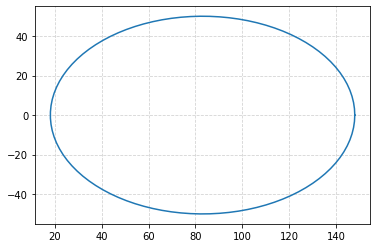

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot(focusx+65*np.cos(t) , 50*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()